# Selección de comunas y criterios de descarte

## Carga de datos

In [24]:
import pandas as pd
# Paso 1: Cargar los datos de estadísticas por comuna y rango de superficie
data_estadisticos_pivot = pd.read_csv('data recuperada/estadisticos_por_comuna_y_rango_pivot.csv')
data_estadisticos = pd.read_csv('data recuperada/estadisticos_por_comuna_y_rango.csv')

In [3]:
data_estadisticos_pivot.columns

Index(['comuna_match', 'Total de Datos_2021S1', 'Total de Datos_2021S2',
       'Total de Datos_2022S1', 'Total de Datos_2022S2',
       'Total de Datos_2023S1', 'Total de Datos_2023S2',
       'Total de Datos_2024S1', 'Total de Datos_2024S2',
       'Total 100-499 m2_2021S1',
       ...
       'Mínimo costo_m2_uf >100000 m2_2024S1',
       'Mínimo costo_m2_uf >100000 m2_2024S2',
       'Máximo costo_m2_uf >100000 m2_2021S1',
       'Máximo costo_m2_uf >100000 m2_2021S2',
       'Máximo costo_m2_uf >100000 m2_2022S1',
       'Máximo costo_m2_uf >100000 m2_2022S2',
       'Máximo costo_m2_uf >100000 m2_2023S1',
       'Máximo costo_m2_uf >100000 m2_2023S2',
       'Máximo costo_m2_uf >100000 m2_2024S1',
       'Máximo costo_m2_uf >100000 m2_2024S2'],
      dtype='object', length=289)

In [4]:
data_estadisticos.columns

Index(['comuna_match', 'Total de Datos', 'Total 100-499 m2', '% 100-499 m2',
       'Total 500-4999 m2', '% 500-4999 m2', 'Total 5000-10000 m2',
       '% 5000-10000 m2', 'Total 10001-100000 m2', '% 10001-100000 m2',
       'Total >100000 m2', '% >100000 m2', 'Mediana costo_m2_uf 100-499 m2',
       'Media costo_m2_uf 100-499 m2', 'Desviación costo_m2_uf 100-499 m2',
       'Mínimo costo_m2_uf 100-499 m2', 'Máximo costo_m2_uf 100-499 m2',
       'IQR costo_m2_uf 100-499 m2', 'Mediana costo_m2_uf 500-4999 m2',
       'Media costo_m2_uf 500-4999 m2', 'Desviación costo_m2_uf 500-4999 m2',
       'Mínimo costo_m2_uf 500-4999 m2', 'Máximo costo_m2_uf 500-4999 m2',
       'IQR costo_m2_uf 500-4999 m2', 'Mediana costo_m2_uf 5000-10000 m2',
       'Media costo_m2_uf 5000-10000 m2',
       'Desviación costo_m2_uf 5000-10000 m2',
       'Mínimo costo_m2_uf 5000-10000 m2', 'Máximo costo_m2_uf 5000-10000 m2',
       'IQR costo_m2_uf 5000-10000 m2', 'Mediana costo_m2_uf 10001-100000 m2',
       'Me

In [26]:
import pandas as pd

# Cargar las datas originales
# data_estadisticos = pd.read_csv("ruta_a_data_estadisticos.csv")
# data_estadisticos_pivot = pd.read_csv("ruta_a_data_estadisticos_pivot.csv")

# Seleccionar las columnas que queremos agregar de data_estadisticos
columnas_a_agregar = [
    'comuna_match', 'Total de Datos', 'Total 100-499 m2', '% 100-499 m2',
    'Total 500-4999 m2', '% 500-4999 m2', 'Total 5000-10000 m2', '% 5000-10000 m2',
    'Total 10001-100000 m2', '% 10001-100000 m2', 'Total >100000 m2', '% >100000 m2',
    'Mediana costo_m2_uf 100-499 m2', 'Mediana costo_m2_uf 500-4999 m2', 
    'Mediana costo_m2_uf 5000-10000 m2', 'Mediana costo_m2_uf 10001-100000 m2', 
    'Mediana costo_m2_uf >100000 m2'
]

# Realizar el merge, agregando las columnas seleccionadas de data_estadisticos a data_estadisticos_pivot
data_estadisticos_pivot = data_estadisticos_pivot.merge(
    data_estadisticos[columnas_a_agregar],
    on='comuna_match',
    how='left'
)

# Guardar el resultado final si es necesario
# data_estadisticos_pivot.to_csv("ruta_a_data_estadisticos_pivot_actualizado.csv", index=False)

# Mostrar una muestra de los resultados
print(data_estadisticos_pivot.head())


      comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0        ALGARROBO                  142.0                  149.0   
1            ALHUE                    3.0                    2.0   
2      ALTO BIOBIO                    3.0                    3.0   
3  ALTO DEL CARMEN                    1.0                    0.0   
4    ALTO HOSPICIO                   26.0                   41.0   

   Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                  167.0                  233.0                  244.0   
1                    6.0                    9.0                    2.0   
2                    3.0                    2.0                    0.0   
3                    1.0                    6.0                    4.0   
4                   23.0                   49.0                   41.0   

   Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                  248.0                  335.0                   84.0  

### Lectura data cluster

In [27]:
import pandas as pd
kmeans = pd.read_csv("data recuperada/comunas cluster/kmeans_semestres_numdatos.csv")
divisive = pd.read_csv("data recuperada/comunas cluster/divisive_semestres_%datos.csv")
jerarquico = pd.read_csv("data recuperada/comunas cluster/jerarquico_semestres_numdatos.csv")

### Merge estadisticos y cluster

In [28]:
# Realizar los merges por 'comuna_match' y agregar la columna 'cluster' correspondiente de cada modelo
comunas_kmeans = data_estadisticos_pivot.merge(kmeans[['comuna_match', 'cluster']], on='comuna_match', how='left', suffixes=('', '_kmeans'))
comunas_divisive = data_estadisticos_pivot.merge(divisive[['comuna_match', 'cluster']], on='comuna_match', how='left', suffixes=('', '_divisive'))
comunas_jerarquico = data_estadisticos_pivot.merge(jerarquico[['comuna_match', 'cluster']], on='comuna_match', how='left', suffixes=('', '_jerarquico'))

# Renombrar las columnas de cluster resultantes para cada merge
comunas_kmeans.rename(columns={'cluster': 'cluster_kmeans'}, inplace=True)
comunas_divisive.rename(columns={'cluster': 'cluster_divisive'}, inplace=True)
comunas_jerarquico.rename(columns={'cluster': 'cluster_jerarquico'}, inplace=True)

# Fusionar todas las columnas de cluster en un solo DataFrame
comunas_merged = data_estadisticos_pivot.copy()
comunas_merged['cluster_kmeans'] = comunas_kmeans['cluster_kmeans']
comunas_merged['cluster_divisive'] = comunas_divisive['cluster_divisive']
comunas_merged['cluster_jerarquico'] = comunas_jerarquico['cluster_jerarquico']

# Mostrar el resultado
print(comunas_merged.head())

      comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0        ALGARROBO                  142.0                  149.0   
1            ALHUE                    3.0                    2.0   
2      ALTO BIOBIO                    3.0                    3.0   
3  ALTO DEL CARMEN                    1.0                    0.0   
4    ALTO HOSPICIO                   26.0                   41.0   

   Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                  167.0                  233.0                  244.0   
1                    6.0                    9.0                    2.0   
2                    3.0                    2.0                    0.0   
3                    1.0                    6.0                    4.0   
4                   23.0                   49.0                   41.0   

   Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                  248.0                  335.0                   84.0  

### Data variaciones

In [29]:
import pandas as pd
variacion_semestre = pd.read_csv("data recuperada/variacion_porcentual_kmeans.csv")
variacion_estadistico = pd.read_csv("data recuperada/variacion estadisticos/variacion_porcentual_kmeans_numdatos_estadisticas_comuna.csv")

### Merged con  data variaciones

In [30]:
# Seleccionar columnas de variación de `variacion_semestre` (excluyendo 'cluster')
columnas_variacion = [col for col in variacion_semestre.columns if 'Variacion' in col and col != 'cluster']
variacion_semestre_filtered = variacion_semestre[['comuna_match'] + columnas_variacion]

# Seleccionar columnas 'Mean' y 'Std' de `variacion_estadistico` (excluyendo 'cluster')
columnas_mean_std = [col for col in variacion_estadistico.columns if col.startswith('Mean') or col.startswith('Std')]
variacion_estadistico_filtered = variacion_estadistico[['comuna_match'] + columnas_mean_std]

# Merge de `comunas_merged` con las columnas de variación de `variacion_semestre`
comunas_merged = comunas_merged.merge(variacion_semestre_filtered, on='comuna_match', how='left')

# Merge de `comunas_merged` con las columnas 'Mean' y 'Std' de `variacion_estadistico`
comunas_merged = comunas_merged.merge(variacion_estadistico_filtered, on='comuna_match', how='left')

# Mostrar una muestra del resultado
print(comunas_merged.head())

      comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0        ALGARROBO                  142.0                  149.0   
1            ALHUE                    3.0                    2.0   
2      ALTO BIOBIO                    3.0                    3.0   
3  ALTO DEL CARMEN                    1.0                    0.0   
4    ALTO HOSPICIO                   26.0                   41.0   

   Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                  167.0                  233.0                  244.0   
1                    6.0                    9.0                    2.0   
2                    3.0                    2.0                    0.0   
3                    1.0                    6.0                    4.0   
4                   23.0                   49.0                   41.0   

   Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                  248.0                  335.0                   84.0  

In [31]:
# Definir los modelos de cluster y los rangos de superficie a analizar
modelos_cluster = ['cluster_kmeans', 'cluster_jerarquico', 'cluster_divisive']
rangos_superficie = ['500-4999 m2', '10001-100000 m2']

# Para cada modelo de cluster, calcula la mediana del Mean Variacion por cluster y por rango de superficie
for modelo in modelos_cluster:
    for rango in rangos_superficie:
        # Seleccionar la columna de Mean Variacion para el rango actual
        columna_mean_variacion = f'Mean Variacion {rango}'
        
        # Calcular la mediana de Mean Variacion agrupado por el cluster del modelo actual
        mediana_por_cluster = (
            comunas_merged.groupby(modelo)[columna_mean_variacion].median().rename(f'Mediana {columna_mean_variacion} por {modelo}')
        )

        # Unir la mediana calculada con comunas_merged repitiendo los valores por cluster
        comunas_merged = comunas_merged.merge(mediana_por_cluster, on=modelo, how='left')
        
# Mostrar una muestra del resultado
print(comunas_merged.head())
      

      comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0        ALGARROBO                  142.0                  149.0   
1            ALHUE                    3.0                    2.0   
2      ALTO BIOBIO                    3.0                    3.0   
3  ALTO DEL CARMEN                    1.0                    0.0   
4    ALTO HOSPICIO                   26.0                   41.0   

   Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                  167.0                  233.0                  244.0   
1                    6.0                    9.0                    2.0   
2                    3.0                    2.0                    0.0   
3                    1.0                    6.0                    4.0   
4                   23.0                   49.0                   41.0   

   Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                  248.0                  335.0                   84.0  

## Filtrado de datos

### Oferta total entre 2023 y 2024S1 >=200

In [32]:
# Calcular la suma de los totales de datos para el 2023S1, 2023S2 y 2024S1
comunas_merged['Suma_Datos_2023_2024S1'] = (
    comunas_merged['Total de Datos_2023S1'] +
    comunas_merged['Total de Datos_2023S2'] +
    comunas_merged['Total de Datos_2024S1']
)

# Filtrar comunas según la condición de que la suma sea mayor a 100
data_principal = comunas_merged[comunas_merged['Suma_Datos_2023_2024S1'] >= 200].copy()
data_excluida = comunas_merged[comunas_merged['Suma_Datos_2023_2024S1'] < 200].copy()

# Eliminar la columna de suma temporal de ambas dataframes si no es necesaria
#data_principal.drop(columns=['Suma_Datos_2023_2024S1'], inplace=True)
#data_excluida.drop(columns=['Suma_Datos_2023_2024S1'], inplace=True)

# Guardar las dataframes en archivos CSV
#data_principal.to_csv('data_principal.csv', index=False)
#data_excluida.to_csv('data_excluida.csv', index=False)

# Mostrar una muestra de los resultados
print("Data Principal (oferta > 200 en 2023S1 + 2023S2 + 2024S1):")
print(data_principal.head())

print("\nData Excluida (oferta <= 200 en 2023S1 + 2023S2 + 2024S1):")
print(data_excluida.head())

# Mostrar el número de comunas en cada conjunto
print(f"\nNúmero de comunas en data_principal (oferta >= 200): {data_principal.shape[0]}")
print(f"Número de comunas en data_excluida (oferta < 200): {data_excluida.shape[0]}")


Data Principal (oferta > 200 en 2023S1 + 2023S2 + 2024S1):
   comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0     ALGARROBO                  142.0                  149.0   
5         ANCUD                  182.0                  222.0   
9   ANTOFAGASTA                   81.0                   83.0   
13        AYSEN                   97.0                   85.0   
14         BUIN                  109.0                  111.0   

    Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                   167.0                  233.0                  244.0   
5                   181.0                  306.0                  199.0   
9                    79.0                  119.0                  110.0   
13                   80.0                  164.0                   99.0   
14                  110.0                  122.0                  142.0   

    Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                   248.

In [33]:
# Calcular la suma de los totales de datos para el rango 500 - 4999 m2 en 2023S1, 2023S2 y 2024S1
data_principal['Suma_Datos_500_4999_2023_2024S1'] = (
    data_principal['Total 500-4999 m2_2023S1'] +
    data_principal['Total 500-4999 m2_2023S2'] +
    data_principal['Total 500-4999 m2_2024S1']
)

# Filtrar comunas con al menos 50 datos en el rango 500 - 4999 m2 para el periodo 2023 y 2024S1
data_principal_filtrada = data_principal[data_principal['Suma_Datos_500_4999_2023_2024S1'] >= 50].copy()
data_excluida_rango = data_principal[data_principal['Suma_Datos_500_4999_2023_2024S1'] < 50].copy()

# Mostrar el número de comunas en cada conjunto después del filtro
print(f"\nNúmero de comunas en data_principal_filtrada (datos >= 50 en 500-4999 m2): {data_principal_filtrada.shape[0]}")
print(f"Número de comunas en data_excluida_rango (datos < 50 en 500-4999 m2): {data_excluida_rango.shape[0]}")

# Opcional: Guardar las dataframes en archivos CSV
#data_principal_filtrada.to_csv('data_principal_filtrada.csv', index=False)
#data_excluida_rango.to_csv('data_excluida_rango.csv', index=False)

# Mostrar una muestra de los resultados
print("\nData Principal Filtrada (con >= 50 datos en rango 500-4999 m2):")
print(data_principal_filtrada.head())
 


Número de comunas en data_principal_filtrada (datos >= 50 en 500-4999 m2): 83
Número de comunas en data_excluida_rango (datos < 50 en 500-4999 m2): 45

Data Principal Filtrada (con >= 50 datos en rango 500-4999 m2):
   comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0     ALGARROBO                  142.0                  149.0   
9   ANTOFAGASTA                   81.0                   83.0   
13        AYSEN                   97.0                   85.0   
14         BUIN                  109.0                  111.0   
30   CASABLANCA                  103.0                  103.0   

    Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                   167.0                  233.0                  244.0   
9                    79.0                  119.0                  110.0   
13                   80.0                  164.0                   99.0   
14                  110.0                  122.0                  142.0   
30               

In [34]:
# Definir el umbral de porcentaje de oferta deseado
umbral_porcentaje = 5

# Calcular el total de oferta en el rango 5000-10000 m2 para el periodo 2023S1, 2023S2, y 2024S1 en data_principal
data_principal_filtrada['Oferta_10001_100000_2023_2024S1'] = (
        data_principal_filtrada['Total 10001-100000 m2_2023S1'] +
        data_principal_filtrada['Total 10001-100000 m2_2023S2'] +
        data_principal_filtrada['Total 10001-100000 m2_2024S1']
)

# Calcular el porcentaje de la oferta en el rango 5000-10000 m2 sobre el total de oferta en 2023S1, 2023S2, y 2024S1
data_principal_filtrada['% Oferta 10001-100000 m2 2023_2024S1'] = (
        data_principal_filtrada['Oferta_10001_100000_2023_2024S1'] / data_principal_filtrada['Suma_Datos_2023_2024S1'] * 100
)

# Crear la columna binaria para indicar si cumple con el umbral de oferta en el rango 5000-10000 m2
data_principal_filtrada['Cumple_5%_10001_100000'] = (
            data_principal_filtrada['% Oferta 10001-100000 m2 2023_2024S1'] >= umbral_porcentaje).astype(int)

# Imprimir el número de comunas que cumplen o no cumplen con el criterio
num_cumple = data_principal_filtrada['Cumple_5%_10001_100000'].sum()
num_no_cumple = data_principal_filtrada.shape[0] - num_cumple

print(f"Número de comunas que cumplen con el {umbral_porcentaje}% de oferta en el rango 10001-100000 m2: {num_cumple}")
print(
    f"Número de comunas que no cumplen con el {umbral_porcentaje}% de oferta en el rango 10001-100000 m2: {num_no_cumple}")

# Mostrar una muestra de los resultados
print(data_principal_filtrada[['comuna_match', '% Oferta 10001-100000 m2 2023_2024S1', 'Cumple_5%_10001_100000']].head())

Número de comunas que cumplen con el 5% de oferta en el rango 10001-100000 m2: 70
Número de comunas que no cumplen con el 5% de oferta en el rango 10001-100000 m2: 13
   comuna_match  % Oferta 10001-100000 m2 2023_2024S1  Cumple_5%_10001_100000
0     ALGARROBO                             17.775091                       1
9   ANTOFAGASTA                             10.776942                       1
13        AYSEN                             32.058824                       1
14         BUIN                             19.310345                       1
30   CASABLANCA                             26.355140                       1


In [35]:
# Definir el umbral de porcentaje de oferta deseado
umbral_porcentaje = 65

# Calcular el total de oferta en el rango 5000-10000 m2 para el periodo 2023S1, 2023S2, y 2024S1 en data_principal
data_principal_filtrada['Oferta_5000_10000_2023_2024S1'] = (
    data_principal_filtrada['Total 5000-10000 m2_2023S1'] +
    data_principal_filtrada['Total 5000-10000 m2_2023S2'] +
    data_principal_filtrada['Total 5000-10000 m2_2024S1']
)

# Calcular el porcentaje de la oferta en el rango 5000-10000 m2 sobre el total de oferta en 2023S1, 2023S2, y 2024S1
data_principal_filtrada['% Oferta 5000-10000 m2 2023_2024S1'] = (
    data_principal_filtrada['Oferta_5000_10000_2023_2024S1'] / data_principal_filtrada['Suma_Datos_2023_2024S1'] * 100
)

# Crear la columna binaria para indicar si cumple con el umbral de oferta en el rango 5000-10000 m2
data_principal_filtrada['Cumple_65%_5000_10000'] = (data_principal_filtrada['% Oferta 5000-10000 m2 2023_2024S1'] >= umbral_porcentaje).astype(int)

# Imprimir el número de comunas que cumplen o no cumplen con el criterio
num_cumple = data_principal_filtrada['Cumple_65%_5000_10000'].sum()
num_no_cumple = data_principal_filtrada.shape[0] - num_cumple

print(f"Número de comunas que cumplen con el {umbral_porcentaje}% de oferta en el rango 5000-10000 m2: {num_cumple}")
print(f"Número de comunas que no cumplen con el {umbral_porcentaje}% de oferta en el rango 5000-10000 m2: {num_no_cumple}")

# Mostrar una muestra de los resultados
print(data_principal_filtrada[['comuna_match', '% Oferta 5000-10000 m2 2023_2024S1', 'Cumple_65%_5000_10000']].head())

Número de comunas que cumplen con el 65% de oferta en el rango 5000-10000 m2: 8
Número de comunas que no cumplen con el 65% de oferta en el rango 5000-10000 m2: 75
   comuna_match  % Oferta 5000-10000 m2 2023_2024S1  Cumple_65%_5000_10000
0     ALGARROBO                           48.609432                      0
9   ANTOFAGASTA                           16.541353                      0
13        AYSEN                           41.764706                      0
14         BUIN                           40.229885                      0
30   CASABLANCA                           55.327103                      0


In [36]:
# Filtrar las comunas que cumplen con ambas condiciones
comunas_cumplen_ambas = data_principal_filtrada[
    (data_principal_filtrada['% Oferta 10001-100000 m2 2023_2024S1'] > 5) &
    (data_principal_filtrada['% Oferta 5000-10000 m2 2023_2024S1'] < 65)
]

# Contar el número de comunas que cumplen ambas condiciones
num_comunas_cumplen_ambas = comunas_cumplen_ambas.shape[0]

print(f"Número de comunas que tienen > 5% de oferta en el rango 10001-100000 m2 y < 65% en el rango 5000-10000 m2: {num_comunas_cumplen_ambas}")

# Mostrar una muestra de las comunas que cumplen ambas condiciones
print(comunas_cumplen_ambas[['comuna_match', '% Oferta 10001-100000 m2 2023_2024S1', '% Oferta 5000-10000 m2 2023_2024S1']].head())

Número de comunas que tienen > 5% de oferta en el rango 10001-100000 m2 y < 65% en el rango 5000-10000 m2: 62
   comuna_match  % Oferta 10001-100000 m2 2023_2024S1  \
0     ALGARROBO                             17.775091   
9   ANTOFAGASTA                             10.776942   
13        AYSEN                             32.058824   
14         BUIN                             19.310345   
30   CASABLANCA                             26.355140   

    % Oferta 5000-10000 m2 2023_2024S1  
0                            48.609432  
9                            16.541353  
13                           41.764706  
14                           40.229885  
30                           55.327103  


In [37]:
comunas_cumplen_ambas.to_csv("data recuperada/sample2.csv", index=False)

In [38]:
comunas_cumplen_ambas = pd.read_csv("data recuperada/sample2.csv")

In [39]:
# Seleccionar las columnas de interés
columnas_seleccionadas = [
    'comuna_match', 
    'cluster_kmeans', 'cluster_divisive', 'cluster_jerarquico', 
    'Mean Variacion 500-4999 m2', 'Mean Variacion 10001-100000 m2', 
    'Mediana Mean Variacion 500-4999 m2 por cluster_kmeans', 
    'Mediana Mean Variacion 10001-100000 m2 por cluster_kmeans', 
    'Mediana Mean Variacion 500-4999 m2 por cluster_divisive', 
    'Mediana Mean Variacion 10001-100000 m2 por cluster_divisive', 
    'Mediana Mean Variacion 500-4999 m2 por cluster_jerarquico', 
    'Mediana Mean Variacion 10001-100000 m2 por cluster_jerarquico'
]

# Crear una nueva DataFrame con las columnas seleccionadas
comunas_sample_filas = comunas_cumplen_ambas[columnas_seleccionadas].copy()

# Guardar el resultado en un archivo CSV (opcional)
comunas_sample_filas.to_csv("data recuperada/comunas_sample_filas2.csv", index=False)

# Mostrar una muestra de la nueva data
print(comunas_sample_filas.head())

  comuna_match  cluster_kmeans  cluster_divisive  cluster_jerarquico  \
0    ALGARROBO               5                 3                   4   
1  ANTOFAGASTA               2                 1                   1   
2        AYSEN               5                 2                   6   
3         BUIN               6                 1                   4   
4   CASABLANCA               5                 3                   6   

   Mean Variacion 500-4999 m2  Mean Variacion 10001-100000 m2  \
0                   -4.054944                        6.120108   
1                   11.977586                      139.157764   
2                   34.455113                        9.544235   
3                    3.204142                       68.164764   
4                   90.270901                       -5.472409   

   Mediana Mean Variacion 500-4999 m2 por cluster_kmeans  \
0                                          40.413185       
1                                           1.526004    

## Grafico de variaciones

### Variación de precio rango [500-4999] m2

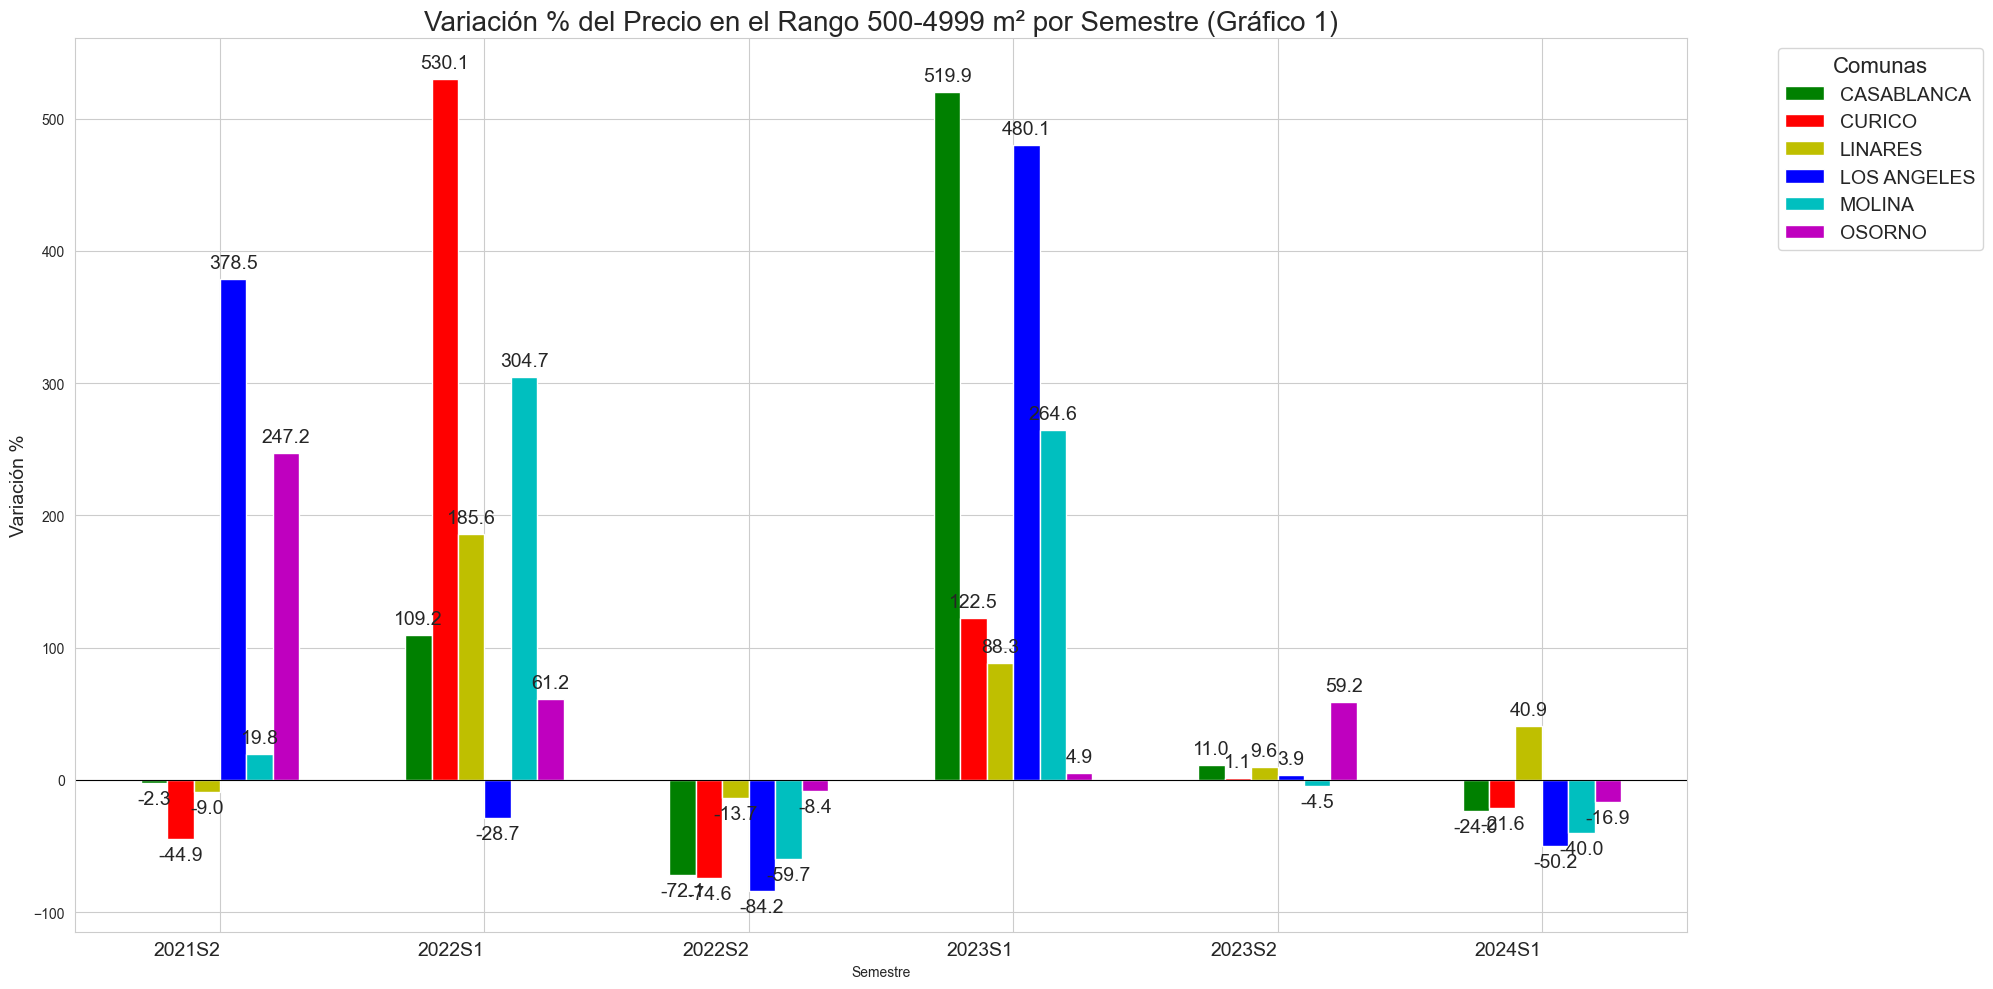

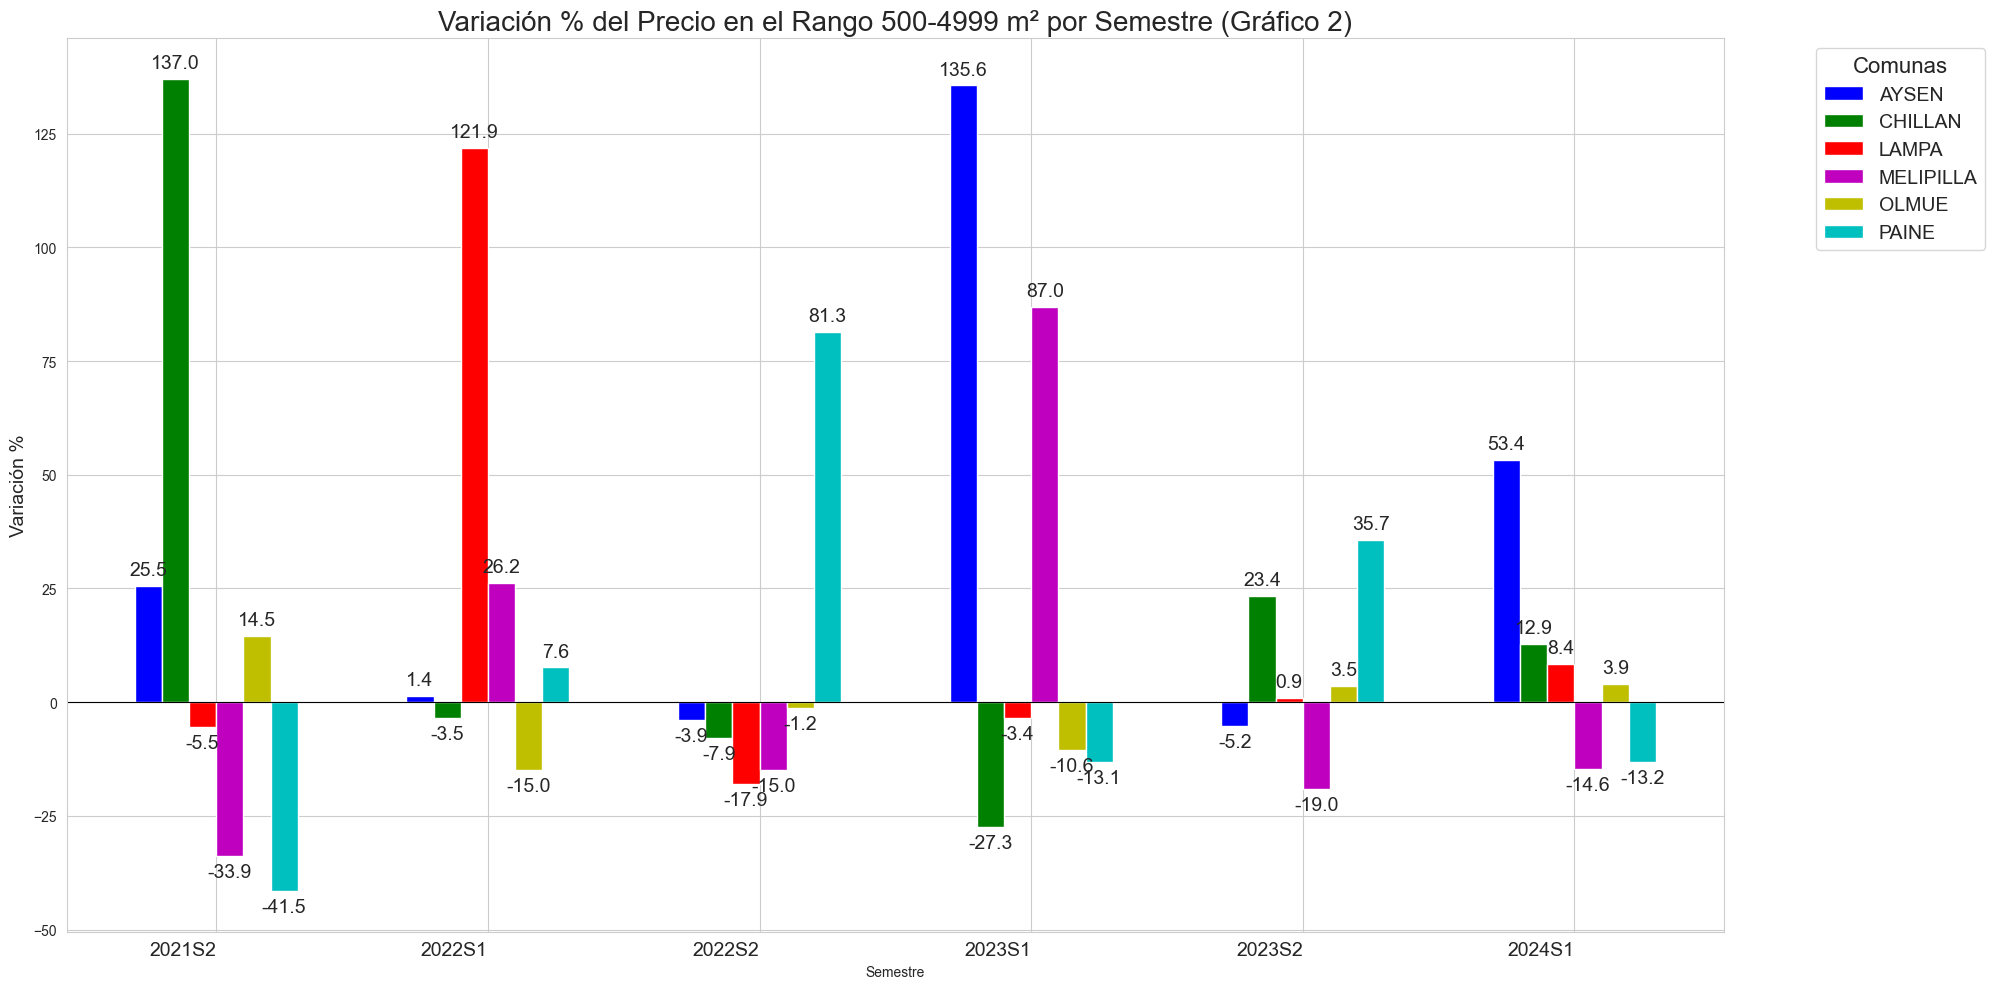

In [121]:
import matplotlib.pyplot as plt

# Comunas para cada gráfico
comunas_grafico1 = ['LOS ANGELES', 'CASABLANCA', 'CURICO', 'MOLINA', 'OSORNO', 'LINARES']
comunas_grafico2 = ['AYSEN', 'CHILLAN', 'LAMPA', 'PAINE', 'MELIPILLA', 'OLMUE']

# Seleccionar las columnas de variación para el rango 500-4999 m2 por semestre
columnas_variacion = [
    'Variacion % Mediana costo_m2_uf 500-4999 m2_2021S2',
    'Variacion % Mediana costo_m2_uf 500-4999 m2_2022S1',
    'Variacion % Mediana costo_m2_uf 500-4999 m2_2022S2',
    'Variacion % Mediana costo_m2_uf 500-4999 m2_2023S1',
    'Variacion % Mediana costo_m2_uf 500-4999 m2_2023S2',
    'Variacion % Mediana costo_m2_uf 500-4999 m2_2024S1'
]

# Definir colores para cada comuna
colores_comunas = {
    'LOS ANGELES': 'b',  # Azul
    'CASABLANCA': 'g',   # Verde
    'CURICO': 'r',       # Rojo
    'MOLINA': 'c',       # Cian
    'OSORNO': 'm',       # Magenta
    'LINARES': 'y',      # Amarillo
    'AYSEN': 'b',
    'CHILLAN': 'g',
    'LAMPA': 'r',
    'PAINE': 'c',
    'MELIPILLA': 'm',
    'OLMUE': 'y'
}

# Crear etiquetas de semestres
etiquetas_semestres = [col.split('_')[-1] for col in columnas_variacion]

# Filtrar las comunas para el primer gráfico
data_grafico1 = data_principal_filtrada[data_principal_filtrada['comuna_match'].isin(comunas_grafico1)]
data_grafico1 = data_grafico1.set_index('comuna_match')[columnas_variacion].T  # Transponer para graficar
data_grafico1.index = etiquetas_semestres  # Renombrar el índice con los semestres simplificados

# Filtrar las comunas para el segundo gráfico
data_grafico2 = data_principal_filtrada[data_principal_filtrada['comuna_match'].isin(comunas_grafico2)]
data_grafico2 = data_grafico2.set_index('comuna_match')[columnas_variacion].T  # Transponer para graficar
data_grafico2.index = etiquetas_semestres  # Renombrar el índice con los semestres simplificados

# Función para agregar etiquetas dentro de las barras con mayor tamaño de fuente
def add_labels(ax, fontsize=14):
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=fontsize, padding=5, fmt='%.1f')

# Crear el primer gráfico
fig, ax1 = plt.subplots(figsize=(20, 10))
data_grafico1.plot(kind='bar', stacked=False, width=0.6, ax=ax1, color=colores_comunas)
ax1.set_title('Variación % del Precio en el Rango 500-4999 m² por Semestre (Gráfico 1)', fontsize=20)
ax1.set_xlabel('Semestre')
ax1.set_ylabel('Variación %', fontsize= 14)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.set_xticklabels(etiquetas_semestres, rotation=0, ha='right', fontsize=14)  # Aumenta el tamaño de fuente aquí
ax1.legend(title='Comunas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)  # Aumenta el tamaño de la leyenda
add_labels(ax1, fontsize=14)
plt.tight_layout()
plt.show()

# Crear el segundo gráfico
fig, ax2 = plt.subplots(figsize=(20, 10))
data_grafico2.plot(kind='bar', stacked=False, width=0.6, ax=ax2, color=colores_comunas)
ax2.set_title('Variación % del Precio en el Rango 500-4999 m² por Semestre (Gráfico 2)', fontsize=20)
ax2.set_xlabel('Semestre')
ax2.set_ylabel('Variación %', fontsize= 14)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_xticklabels(etiquetas_semestres, rotation=0, ha='right', fontsize=14)  # Aumenta el tamaño de fuente aquí
ax2.legend(title='Comunas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)  # Aumenta el tamaño de la leyenda
add_labels(ax2, fontsize=14)
plt.tight_layout()
plt.show()


### Variación de precio rango [10001-100000] m2

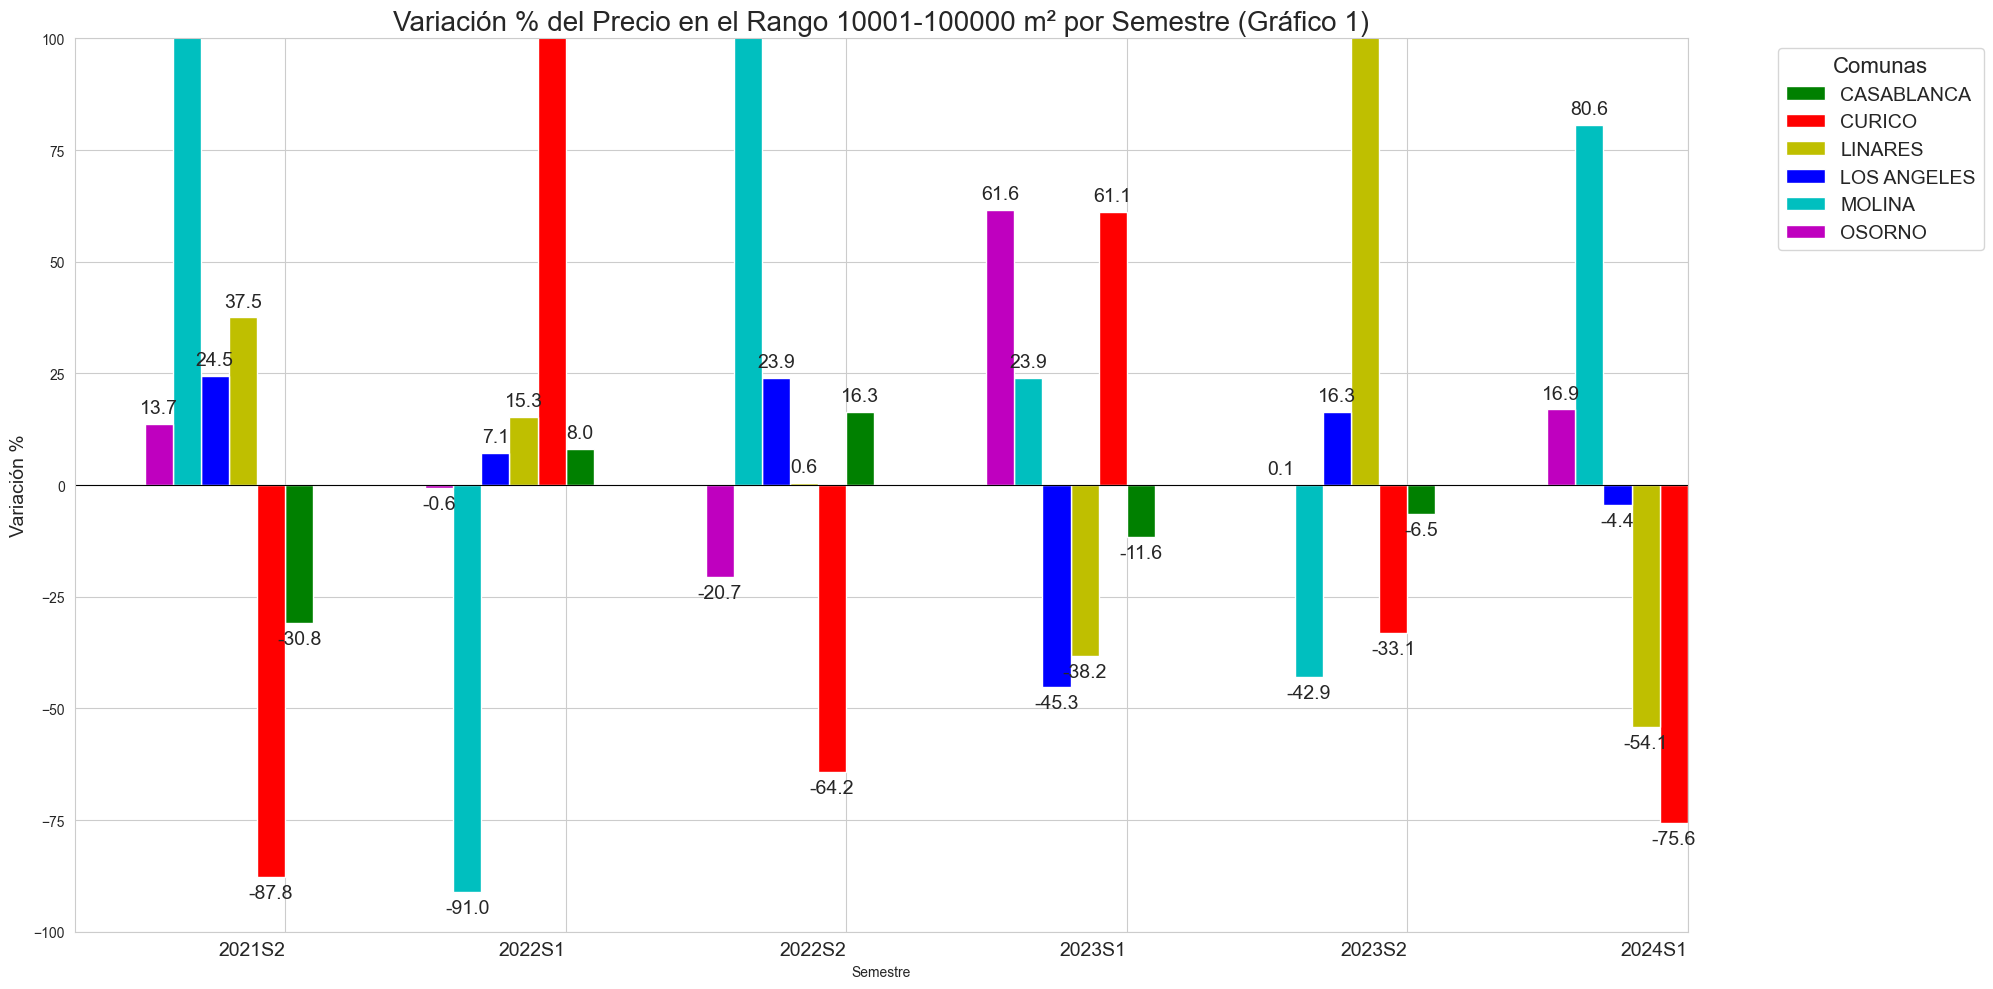

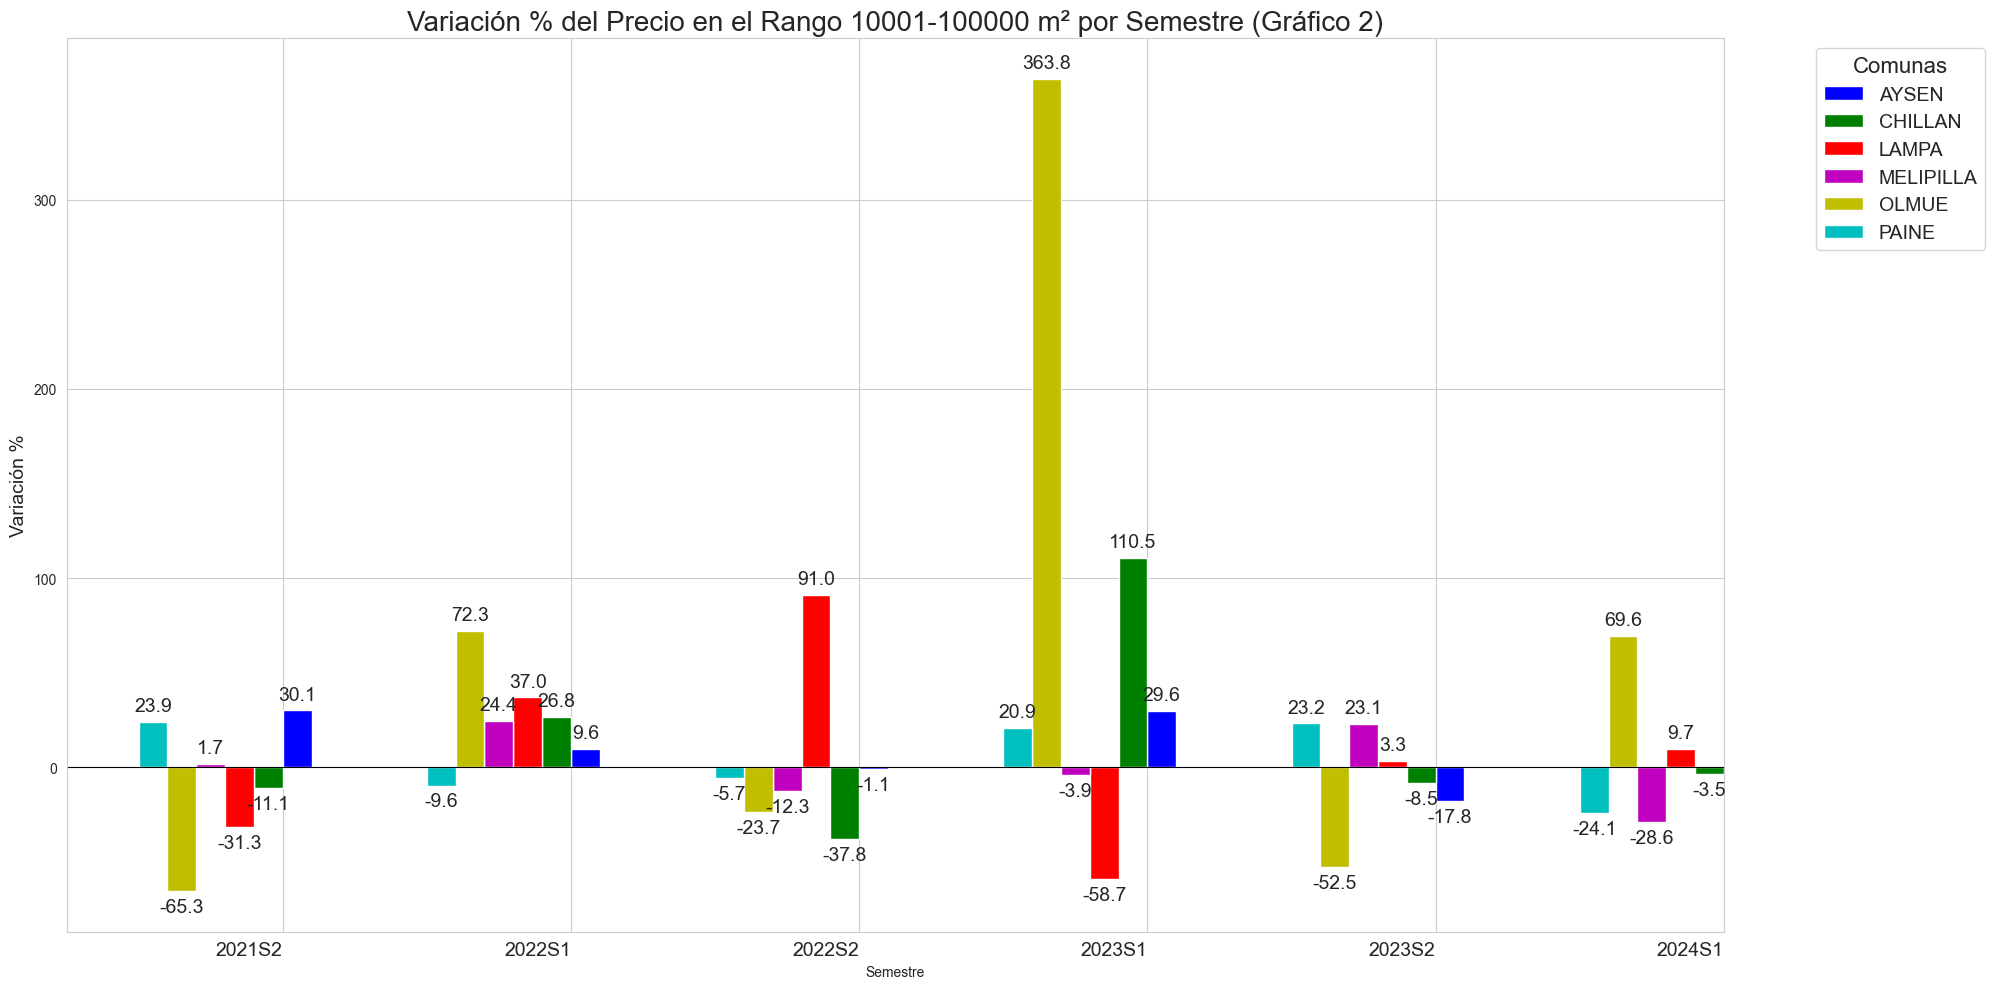

In [122]:
import matplotlib.pyplot as plt

# Comunas para cada gráfico
comunas_grafico1 = ['LOS ANGELES', 'CASABLANCA', 'CURICO', 'MOLINA', 'OSORNO', 'LINARES']
comunas_grafico2 = ['AYSEN', 'CHILLAN', 'LAMPA', 'PAINE', 'MELIPILLA', 'OLMUE']

# Seleccionar las columnas de variación para el rango 10001-100000 m2 por semestre
columnas_variacion = [
    'Variacion % Mediana costo_m2_uf 10001-100000 m2_2021S2',
    'Variacion % Mediana costo_m2_uf 10001-100000 m2_2022S1',
    'Variacion % Mediana costo_m2_uf 10001-100000 m2_2022S2',
    'Variacion % Mediana costo_m2_uf 10001-100000 m2_2023S1',
    'Variacion % Mediana costo_m2_uf 10001-100000 m2_2023S2',
    'Variacion % Mediana costo_m2_uf 10001-100000 m2_2024S1'
]

# Crear etiquetas de semestres
etiquetas_semestres = [col.split('_')[-1] for col in columnas_variacion]

# Filtrar las comunas para el primer gráfico
data_grafico1 = data_principal_filtrada[data_principal_filtrada['comuna_match'].isin(comunas_grafico1)]
data_grafico1 = data_grafico1.set_index('comuna_match')[columnas_variacion].T  # Transponer para graficar
data_grafico1.index = etiquetas_semestres  # Renombrar el índice con los semestres simplificados

# Filtrar las comunas para el segundo gráfico
data_grafico2 = data_principal_filtrada[data_principal_filtrada['comuna_match'].isin(comunas_grafico2)]
data_grafico2 = data_grafico2.set_index('comuna_match')[columnas_variacion].T  # Transponer para graficar
data_grafico2.index = etiquetas_semestres  # Renombrar el índice con los semestres simplificados

# Función para agregar etiquetas dentro de las barras con mayor tamaño de fuente
def add_labels(ax, fontsize=14):
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=fontsize, padding=5, fmt='%.1f')

# Crear el primer gráfico de barras con colores personalizados
fig, ax1 = plt.subplots(figsize=(20, 10))
for i, comuna in enumerate(data_grafico1.columns):
    data_grafico1[comuna].plot(kind='bar', ax=ax1, color=colores_comunas[comuna], width=0.1, position=i, label=comuna)
ax1.set_title('Variación % del Precio en el Rango 10001-100000 m² por Semestre (Gráfico 1)', fontsize=20)
ax1.set_xlabel('Semestre')
ax1.set_ylabel('Variación %', fontsize=14)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.set_xticklabels(etiquetas_semestres, rotation=0, ha='right', fontsize=14)  # Aumenta el tamaño de fuente aquí
ax1.legend(title='Comunas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)  # Aumenta el tamaño de la leyenda
add_labels(ax1, fontsize=14)
plt.tight_layout()
ax1.set_ylim(-100, 100)
plt.show()


# Crear el segundo gráfico de barras con colores personalizados
fig, ax2 = plt.subplots(figsize=(20, 10))
for i, comuna in enumerate(data_grafico2.columns):
    data_grafico2[comuna].plot(kind='bar', ax=ax2, color=colores_comunas[comuna], width=0.1, position=i, label=comuna)
ax2.set_title('Variación % del Precio en el Rango 10001-100000 m² por Semestre (Gráfico 2)', fontsize=20)
ax2.set_xlabel('Semestre')
ax2.set_ylabel('Variación %', fontsize=14)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_xticklabels(etiquetas_semestres, rotation=0, ha='right', fontsize=14)  # Aumenta el tamaño de fuente aquí
ax2.legend(title='Comunas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)  # Aumenta el tamaño de la leyenda
add_labels(ax2, fontsize=14)
plt.tight_layout()
plt.show()


### Precios rango [500-4999] m2

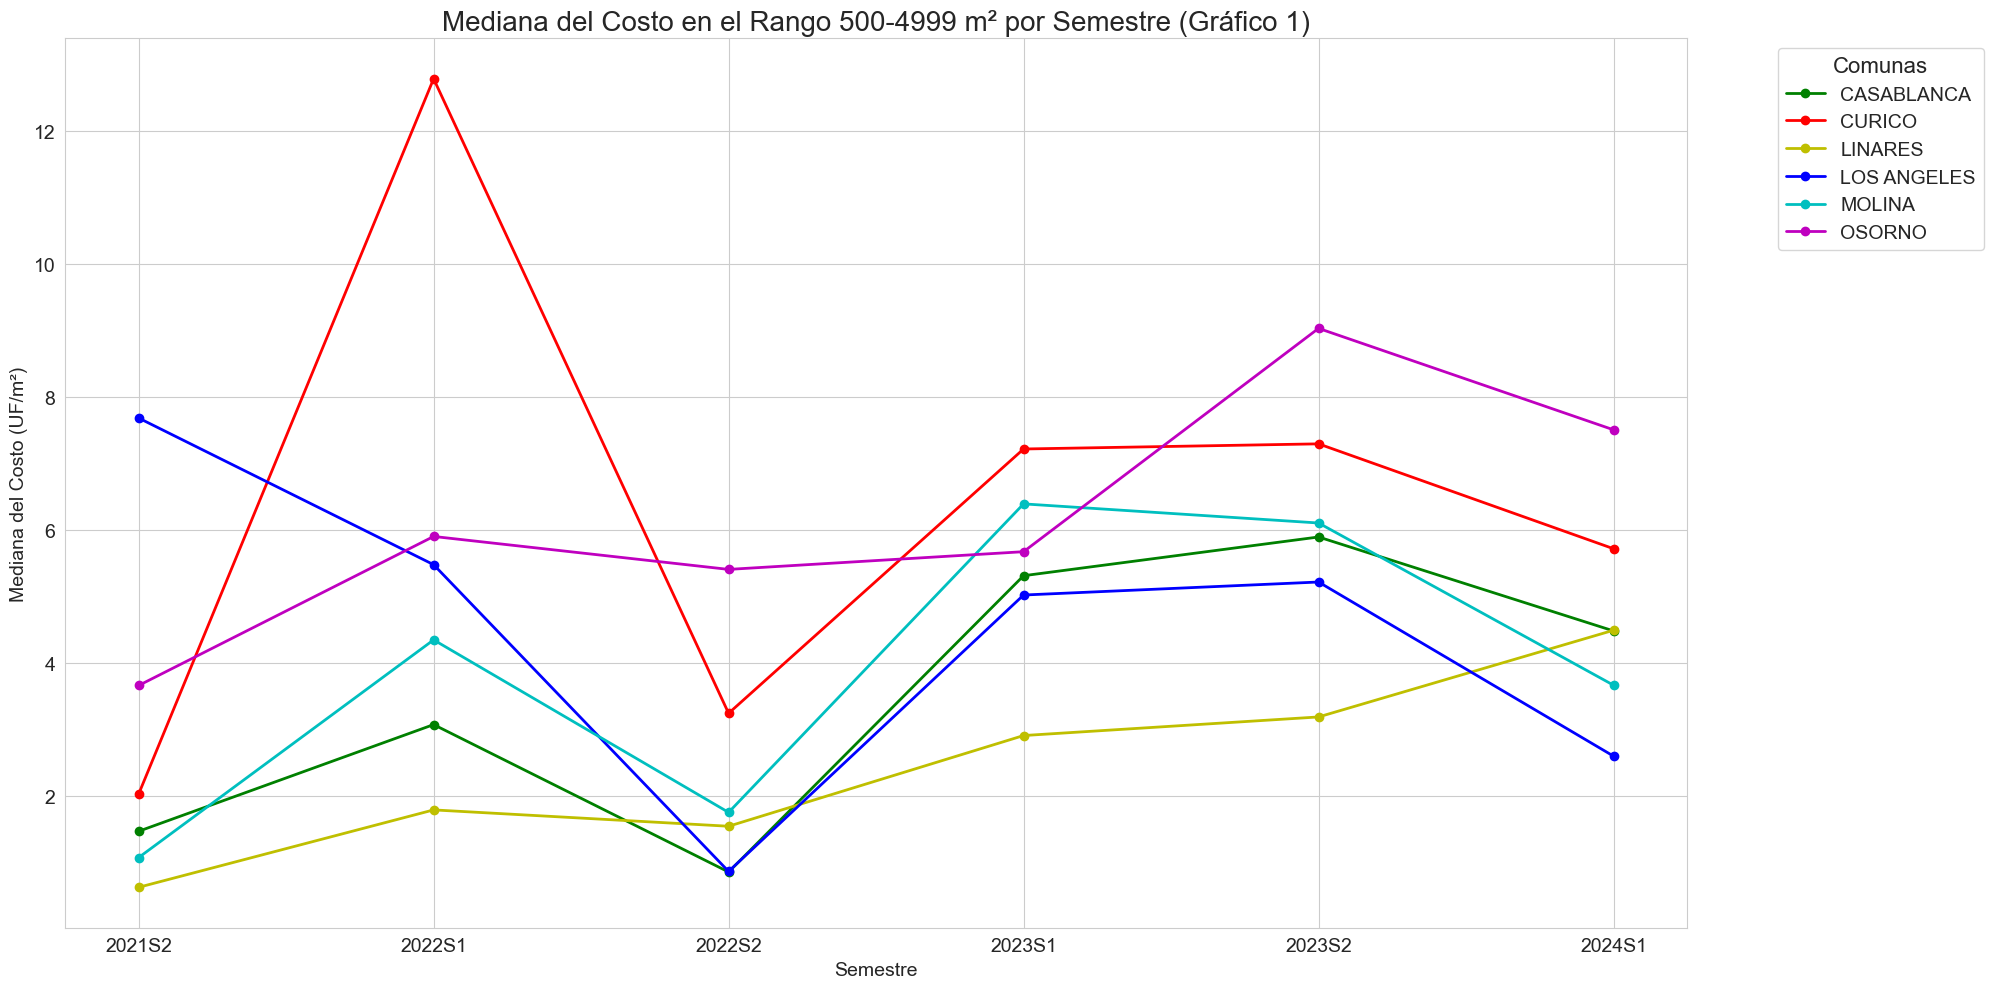

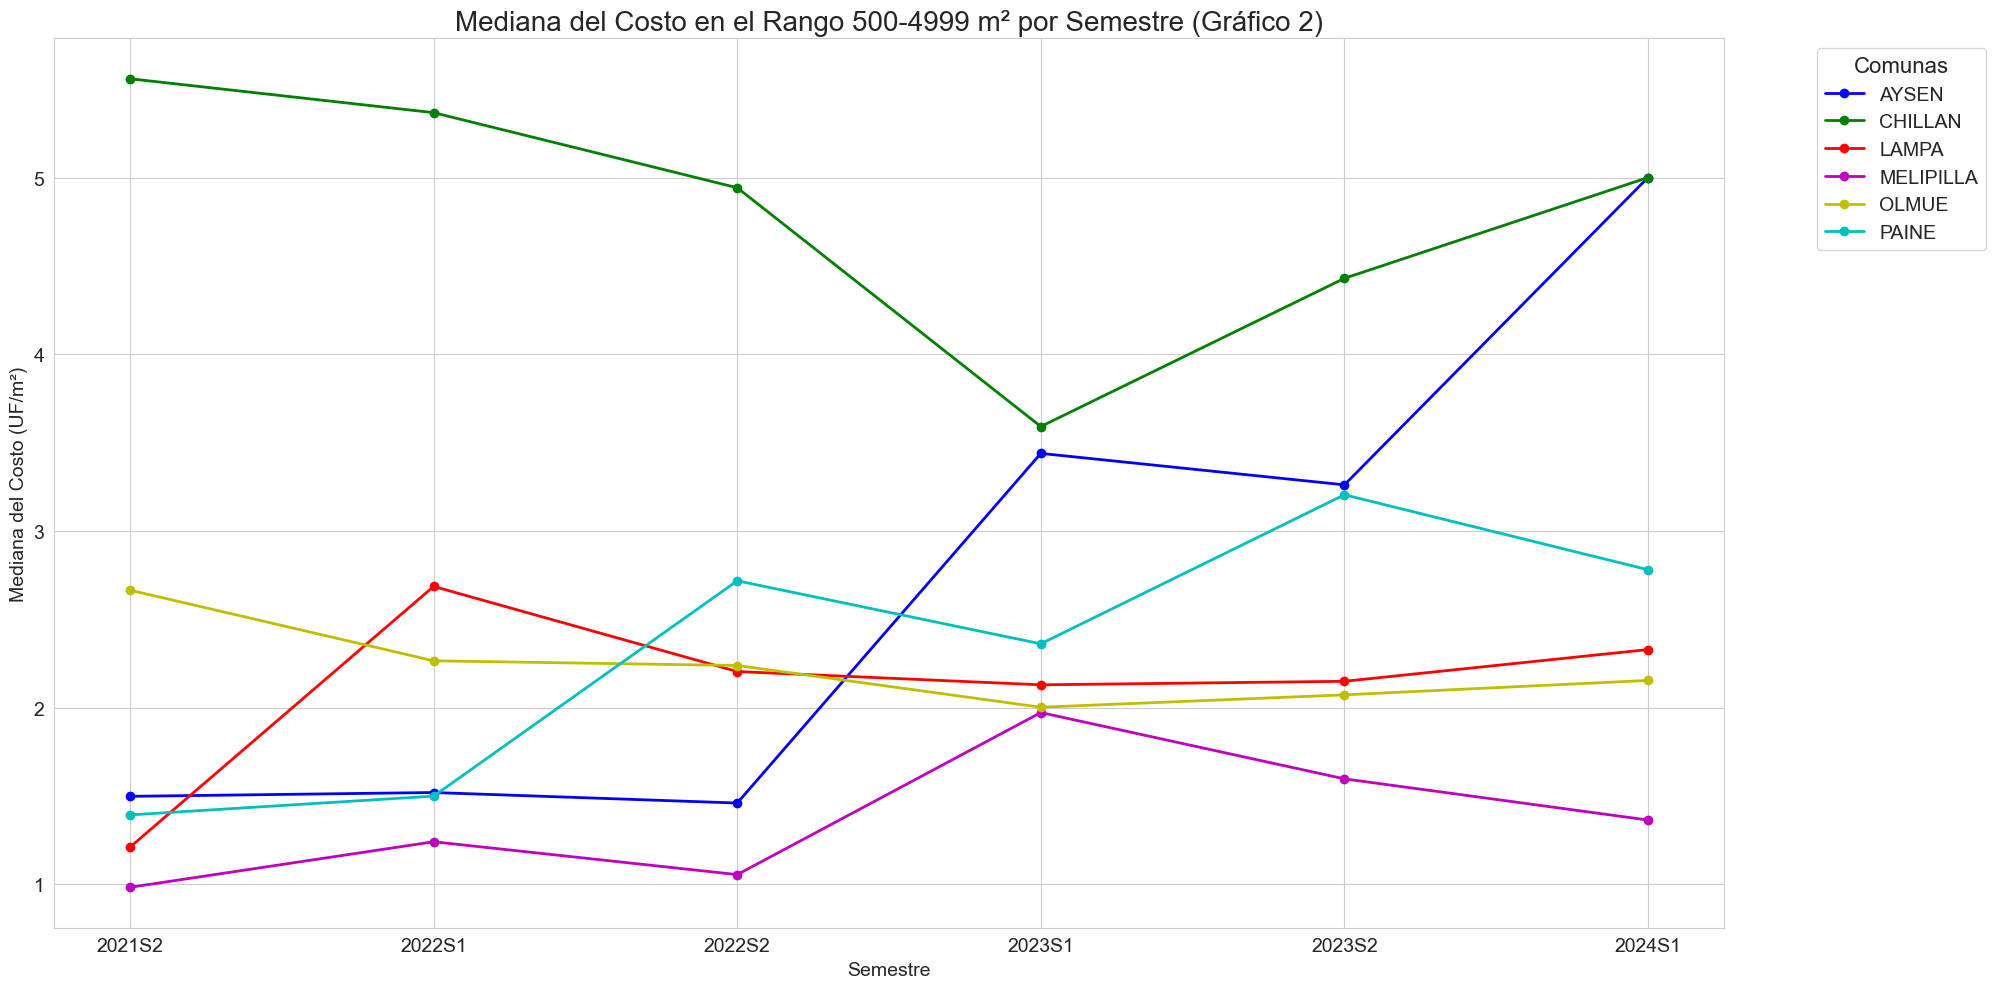

In [123]:
import matplotlib.pyplot as plt

# Definir colores para cada comuna
colores_comunas = {
    'LOS ANGELES': 'b',  # Azul
    'CASABLANCA': 'g',   # Verde
    'CURICO': 'r',       # Rojo
    'MOLINA': 'c',       # Cian
    'OSORNO': 'm',       # Magenta
    'LINARES': 'y',      # Amarillo
    'AYSEN': 'b',
    'CHILLAN': 'g',
    'LAMPA': 'r',
    'PAINE': 'c',
    'MELIPILLA': 'm',
    'OLMUE': 'y'
}

# Comunas para cada gráfico
comunas_grafico1 = ['LOS ANGELES', 'CASABLANCA', 'CURICO', 'MOLINA', 'OSORNO', 'LINARES']
comunas_grafico2 = ['AYSEN', 'CHILLAN', 'LAMPA', 'PAINE', 'MELIPILLA', 'OLMUE']

# Seleccionar las columnas de mediana del costo para el rango 500-4999 m2 por semestre
columnas_mediana = [
    'Mediana costo_m2_uf 500-4999 m2_2021S2',
    'Mediana costo_m2_uf 500-4999 m2_2022S1',
    'Mediana costo_m2_uf 500-4999 m2_2022S2',
    'Mediana costo_m2_uf 500-4999 m2_2023S1',
    'Mediana costo_m2_uf 500-4999 m2_2023S2',
    'Mediana costo_m2_uf 500-4999 m2_2024S1'
]

# Crear etiquetas de semestres
etiquetas_semestres = [col.split('_')[-1] for col in columnas_mediana]

# Filtrar las comunas para el primer gráfico
data_grafico1 = data_principal_filtrada[data_principal_filtrada['comuna_match'].isin(comunas_grafico1)]
data_grafico1 = data_grafico1.set_index('comuna_match')[columnas_mediana].T  # Transponer para graficar
data_grafico1.index = etiquetas_semestres  # Renombrar el índice con los semestres simplificados

# Filtrar las comunas para el segundo gráfico
data_grafico2 = data_principal_filtrada[data_principal_filtrada['comuna_match'].isin(comunas_grafico2)]
data_grafico2 = data_grafico2.set_index('comuna_match')[columnas_mediana].T  # Transponer para graficar
data_grafico2.index = etiquetas_semestres  # Renombrar el índice con los semestres simplificados

# Crear el primer gráfico de líneas con colores personalizados
fig, ax1 = plt.subplots(figsize=(20, 10))
for comuna in data_grafico1.columns:
    data_grafico1[comuna].plot(kind='line', marker='o', ax=ax1, linewidth=2, label=comuna, color=colores_comunas[comuna])
ax1.set_title('Mediana del Costo en el Rango 500-4999 m² por Semestre (Gráfico 1)', fontsize=20)
ax1.set_xlabel('Semestre', fontsize=14)
ax1.set_ylabel('Mediana del Costo (UF/m²)', fontsize=14)
ax1.set_xticks(range(len(etiquetas_semestres)))
ax1.set_xticklabels(etiquetas_semestres, rotation=0, ha='center', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(title='Comunas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()

# Crear el segundo gráfico de líneas con colores personalizados
fig, ax2 = plt.subplots(figsize=(20, 10))
for comuna in data_grafico2.columns:
    data_grafico2[comuna].plot(kind='line', marker='o', ax=ax2, linewidth=2, label=comuna, color=colores_comunas[comuna])
ax2.set_title('Mediana del Costo en el Rango 500-4999 m² por Semestre (Gráfico 2)', fontsize=20)
ax2.set_xlabel('Semestre', fontsize=14)
ax2.set_ylabel('Mediana del Costo (UF/m²)', fontsize=14)
ax2.set_xticks(range(len(etiquetas_semestres)))
ax2.set_xticklabels(etiquetas_semestres, rotation=0, ha='center', fontsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(title='Comunas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()



### Precios [10001-100000] m2 

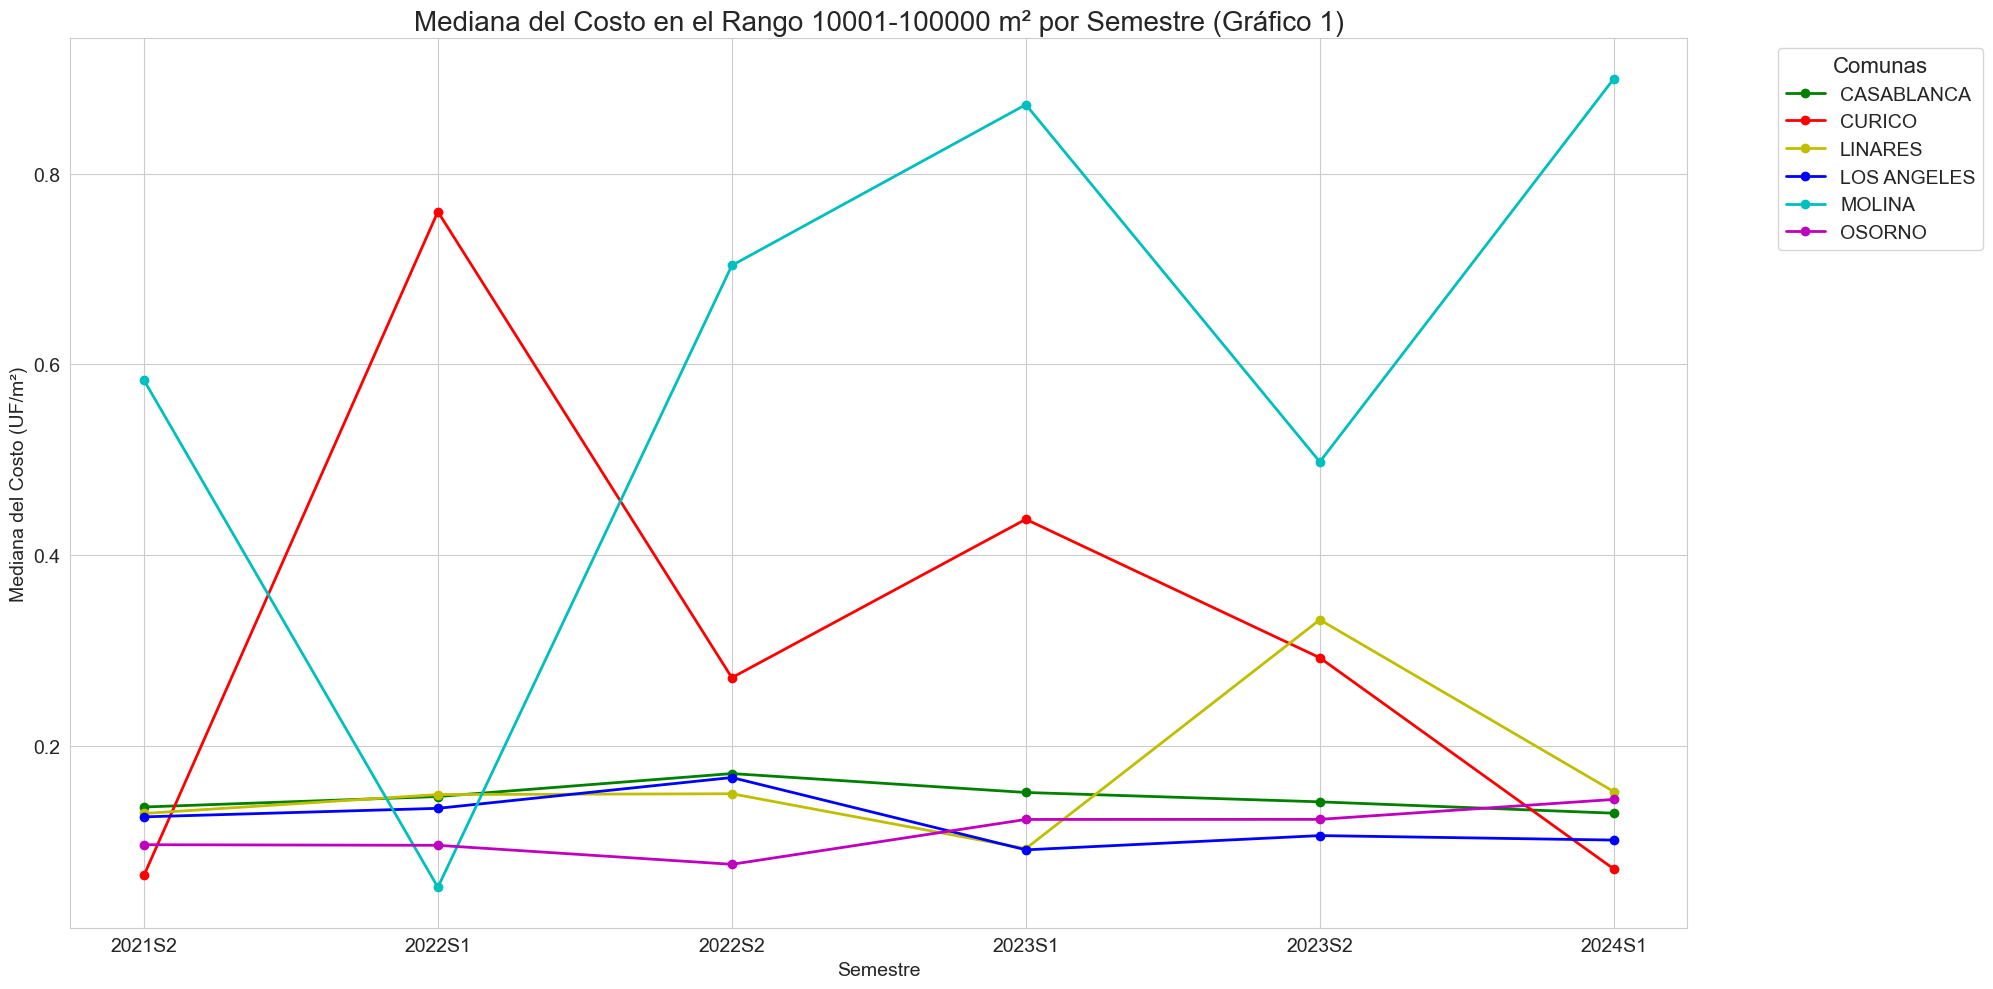

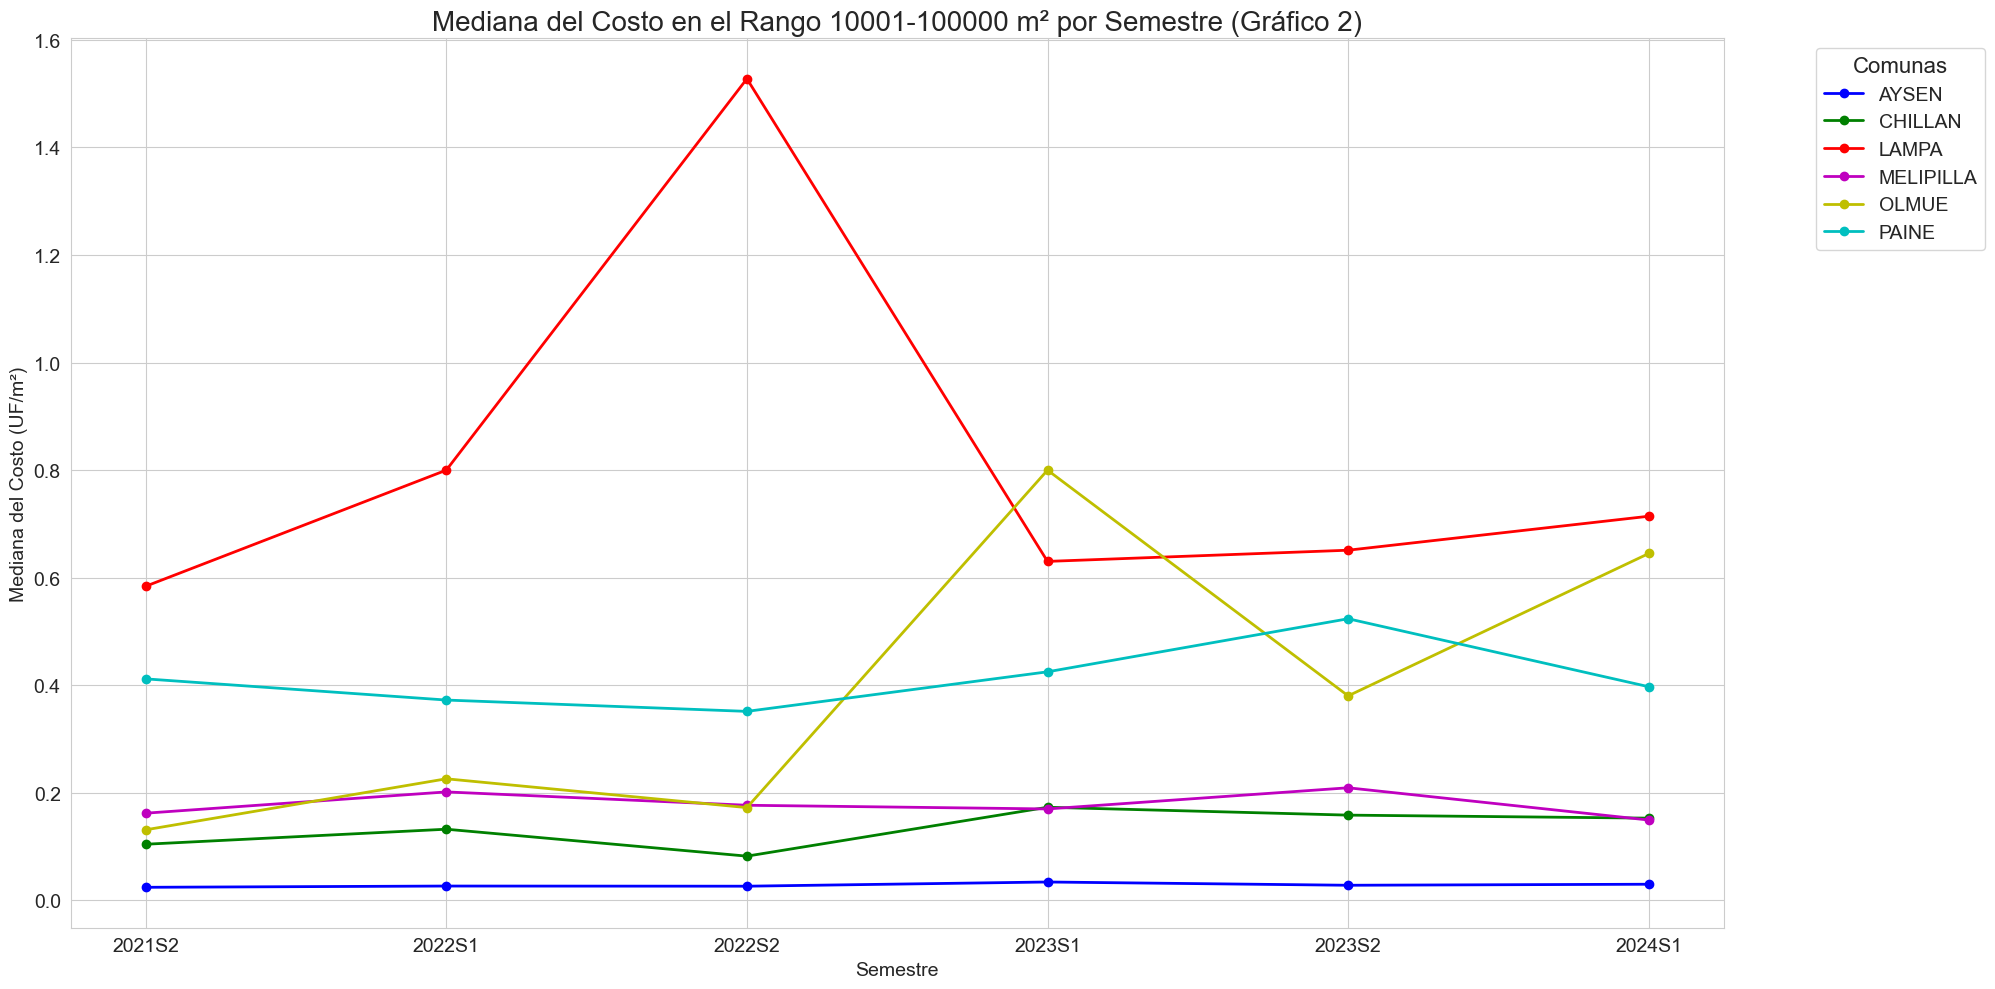

In [124]:
# Comunas para cada gráfico
comunas_grafico1 = ['LOS ANGELES', 'CASABLANCA', 'CURICO', 'MOLINA', 'OSORNO', 'LINARES']
comunas_grafico2 = ['AYSEN', 'CHILLAN', 'LAMPA', 'PAINE', 'MELIPILLA', 'OLMUE']

# Seleccionar las columnas de mediana del costo para el rango 500-4999 m2 por semestre
columnas_mediana = [
    'Mediana costo_m2_uf 10001-100000 m2_2021S2',
    'Mediana costo_m2_uf 10001-100000 m2_2022S1',
    'Mediana costo_m2_uf 10001-100000 m2_2022S2',
    'Mediana costo_m2_uf 10001-100000 m2_2023S1',
    'Mediana costo_m2_uf 10001-100000 m2_2023S2',
    'Mediana costo_m2_uf 10001-100000 m2_2024S1'
]

# Crear etiquetas de semestres
etiquetas_semestres = [col.split('_')[-1] for col in columnas_mediana]

# Filtrar las comunas para el primer gráfico
data_grafico1 = data_principal_filtrada[data_principal_filtrada['comuna_match'].isin(comunas_grafico1)]
data_grafico1 = data_grafico1.set_index('comuna_match')[columnas_mediana].T  # Transponer para graficar
data_grafico1.index = etiquetas_semestres  # Renombrar el índice con los semestres simplificados

# Filtrar las comunas para el segundo gráfico
data_grafico2 = data_principal_filtrada[data_principal_filtrada['comuna_match'].isin(comunas_grafico2)]
data_grafico2 = data_grafico2.set_index('comuna_match')[columnas_mediana].T  # Transponer para graficar
data_grafico2.index = etiquetas_semestres  # Renombrar el índice con los semestres simplificados

# Crear el primer gráfico de líneas con colores personalizados
fig, ax1 = plt.subplots(figsize=(20, 10))
for comuna in data_grafico1.columns:
    data_grafico1[comuna].plot(kind='line', marker='o', ax=ax1, linewidth=2, label=comuna, color=colores_comunas[comuna])
ax1.set_title('Mediana del Costo en el Rango 10001-100000 m² por Semestre (Gráfico 1)', fontsize=20)
ax1.set_xlabel('Semestre', fontsize=14)
ax1.set_ylabel('Mediana del Costo (UF/m²)', fontsize=14)
ax1.set_xticks(range(len(etiquetas_semestres)))
ax1.set_xticklabels(etiquetas_semestres, rotation=0, ha='center', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(title='Comunas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()

# Crear el segundo gráfico de líneas con colores personalizados
fig, ax2 = plt.subplots(figsize=(20, 10))
for comuna in data_grafico2.columns:
    data_grafico2[comuna].plot(kind='line', marker='o', ax=ax2, linewidth=2, label=comuna, color=colores_comunas[comuna])
ax2.set_title('Mediana del Costo en el Rango 10001-100000 m² por Semestre (Gráfico 2)', fontsize=20)
ax2.set_xlabel('Semestre', fontsize=14)
ax2.set_ylabel('Mediana del Costo (UF/m²)', fontsize=14)
ax2.set_xticks(range(len(etiquetas_semestres)))
ax2.set_xticklabels(etiquetas_semestres, rotation=0, ha='center', fontsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(title='Comunas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()

### Ofertas

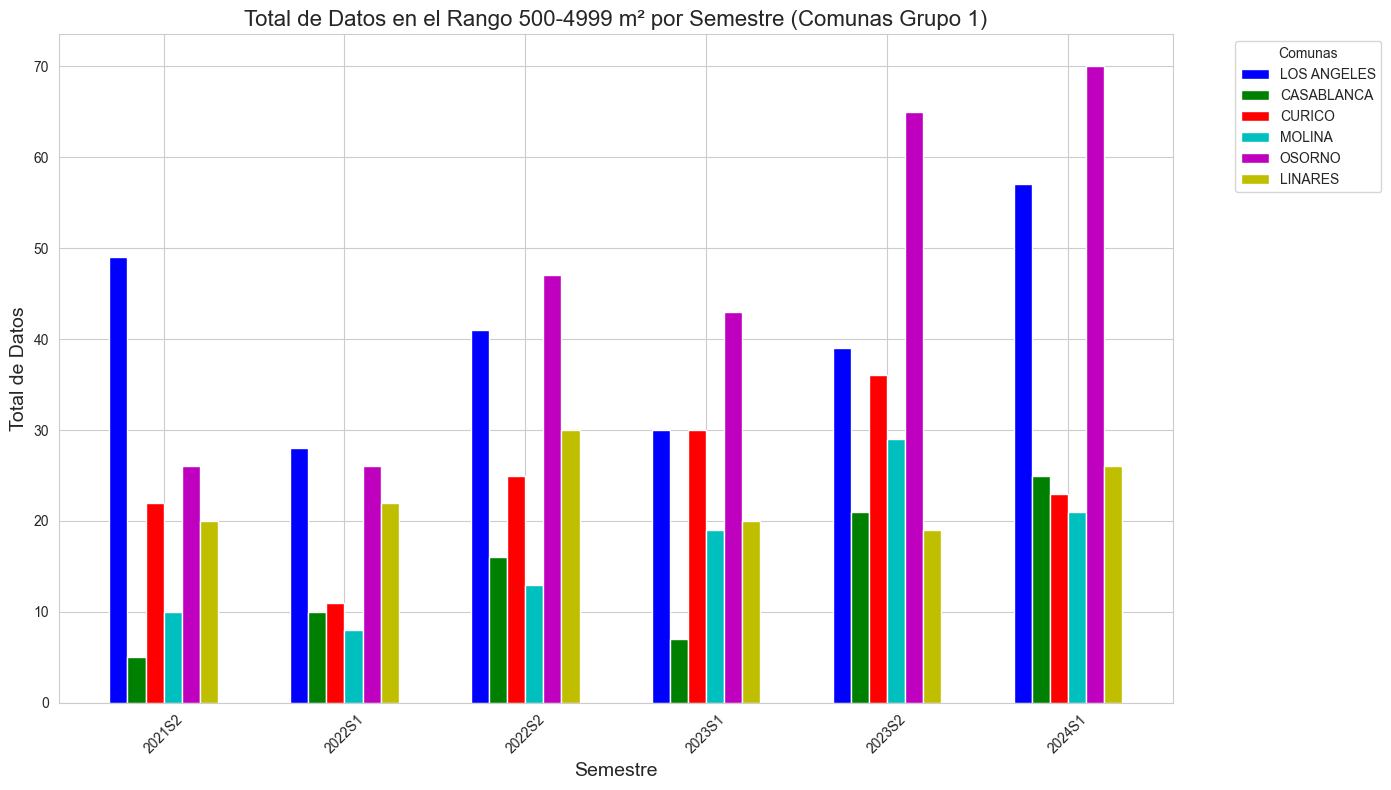

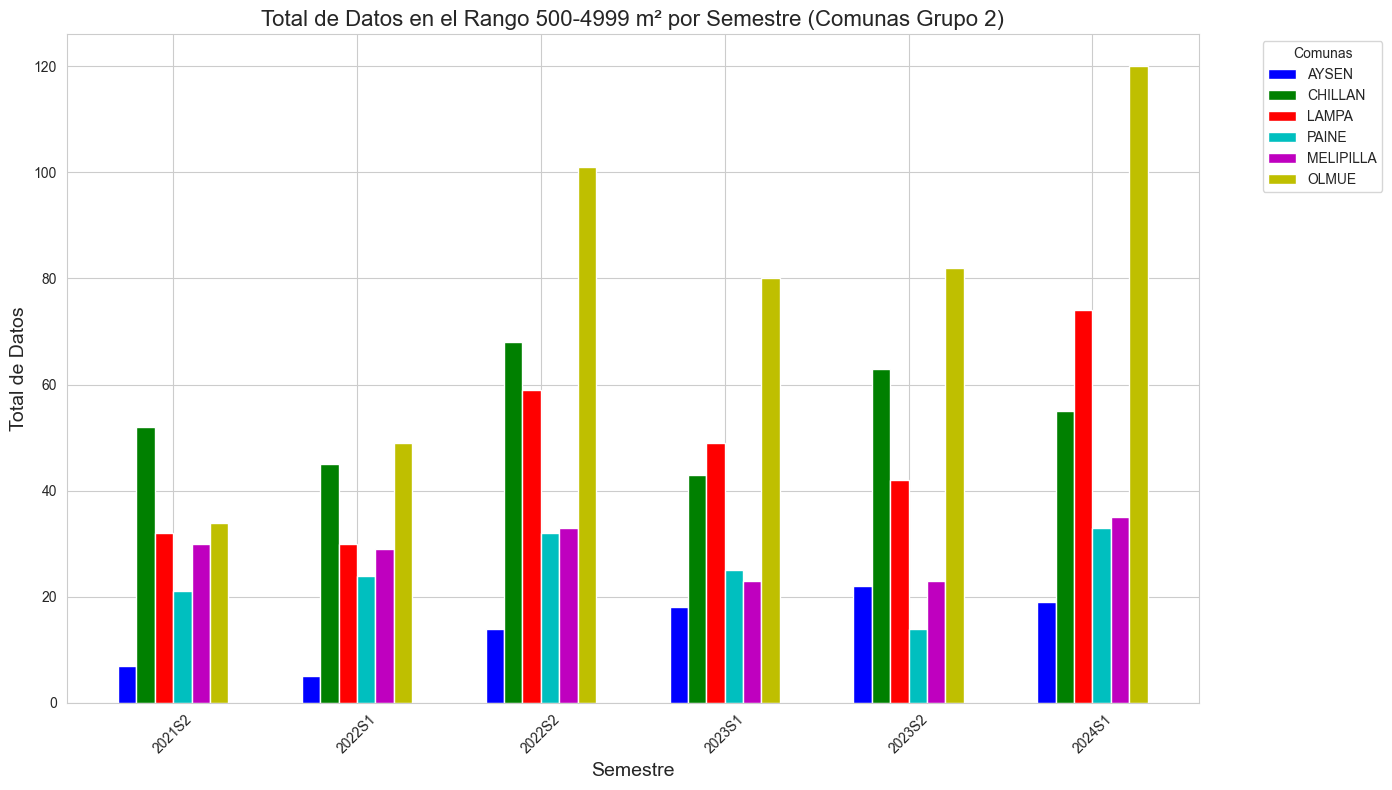

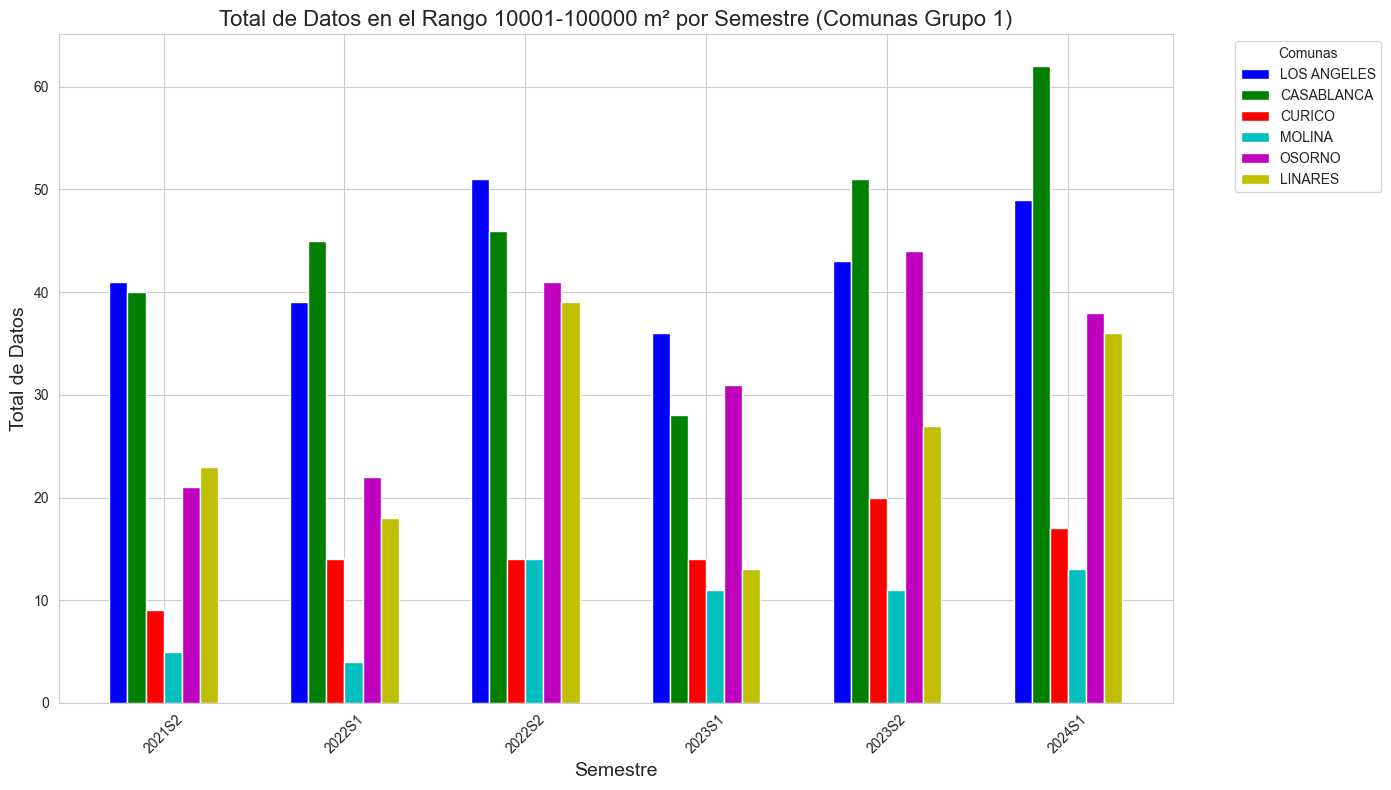

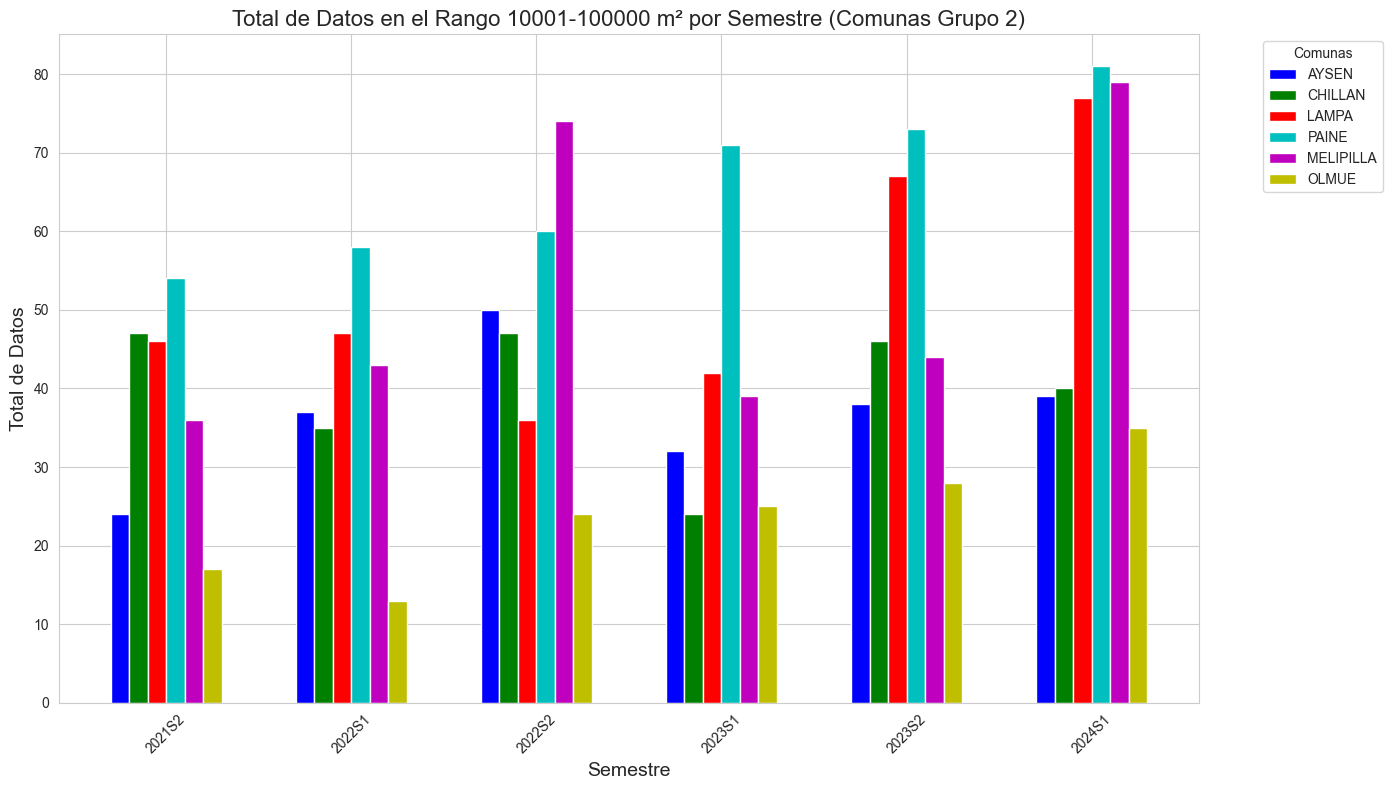

In [85]:
import matplotlib.pyplot as plt

# Comunas para cada gráfico
comunas_grafico1 = ['LOS ANGELES', 'CASABLANCA', 'CURICO', 'MOLINA', 'OSORNO', 'LINARES']
comunas_grafico2 = ['AYSEN', 'CHILLAN', 'LAMPA', 'PAINE', 'MELIPILLA', 'OLMUE']

# Seleccionar las columnas de total de datos para los rangos 500-4999 m2 y 10001-100000 m2 por semestre
columnas_totales_500_4999 = [
    'Total 500-4999 m2_2021S2', 'Total 500-4999 m2_2022S1', 'Total 500-4999 m2_2022S2',
    'Total 500-4999 m2_2023S1', 'Total 500-4999 m2_2023S2', 'Total 500-4999 m2_2024S1'
]
columnas_totales_10001_100000 = [
    'Total 10001-100000 m2_2021S2', 'Total 10001-100000 m2_2022S1', 'Total 10001-100000 m2_2022S2',
    'Total 10001-100000 m2_2023S1', 'Total 10001-100000 m2_2023S2', 'Total 10001-100000 m2_2024S1'
]

# Crear etiquetas de semestres
etiquetas_semestres = [col.split('_')[-1] for col in columnas_totales_500_4999]

# Colores específicos para cada comuna
colores_comunas = {
    'LOS ANGELES': 'b',  # Azul
    'CASABLANCA': 'g',   # Verde
    'CURICO': 'r',       # Rojo
    'MOLINA': 'c',       # Cian
    'OSORNO': 'm',       # Magenta
    'LINARES': 'y',      # Amarillo
    'AYSEN': 'b',
    'CHILLAN': 'g',
    'LAMPA': 'r',
    'PAINE': 'c',
    'MELIPILLA': 'm',
    'OLMUE': 'y'
}

# Función para graficar el total de datos para un grupo de comunas y un rango de superficie en barras
def plot_total_datos_por_rango_barras(comunas, columnas_totales, titulo):
    fig, ax = plt.subplots(figsize=(14, 8))
    width = 0.1  # Ancho de cada barra
    x = range(len(etiquetas_semestres))  # Posiciones en el eje X para los semestres
    
    # Graficar cada comuna con barras separadas y color específico
    for i, comuna in enumerate(comunas):
        data_comuna = data_principal_filtrada[data_principal_filtrada['comuna_match'] == comuna]
        totales_comuna = data_comuna[columnas_totales].values.flatten()
        ax.bar([p + i * width for p in x], totales_comuna, width=width, label=comuna, color=colores_comunas[comuna])

    # Configuraciones del gráfico
    ax.set_title(titulo, fontsize=16)
    ax.set_xlabel('Semestre', fontsize=14)
    ax.set_ylabel('Total de Datos', fontsize=14)
    ax.set_xticks([p + width * (len(comunas) - 1) / 2 for p in x])  # Centrar etiquetas de semestres
    ax.set_xticklabels(etiquetas_semestres, rotation=45)
    ax.legend(title='Comunas', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Graficar para el rango 500-4999 m2, grupo de comunas 1
plot_total_datos_por_rango_barras(comunas_grafico1, columnas_totales_500_4999,
                                  'Total de Datos en el Rango 500-4999 m² por Semestre (Comunas Grupo 1)')

# Graficar para el rango 500-4999 m2, grupo de comunas 2
plot_total_datos_por_rango_barras(comunas_grafico2, columnas_totales_500_4999,
                                  'Total de Datos en el Rango 500-4999 m² por Semestre (Comunas Grupo 2)')

# Graficar para el rango 10001-100000 m2, grupo de comunas 1
plot_total_datos_por_rango_barras(comunas_grafico1, columnas_totales_10001_100000,
                                  'Total de Datos en el Rango 10001-100000 m² por Semestre (Comunas Grupo 1)')

# Graficar para el rango 10001-100000 m2, grupo de comunas 2
plot_total_datos_por_rango_barras(comunas_grafico2, columnas_totales_10001_100000,
                                  'Total de Datos en el Rango 10001-100000 m² por Semestre (Comunas Grupo 2)')


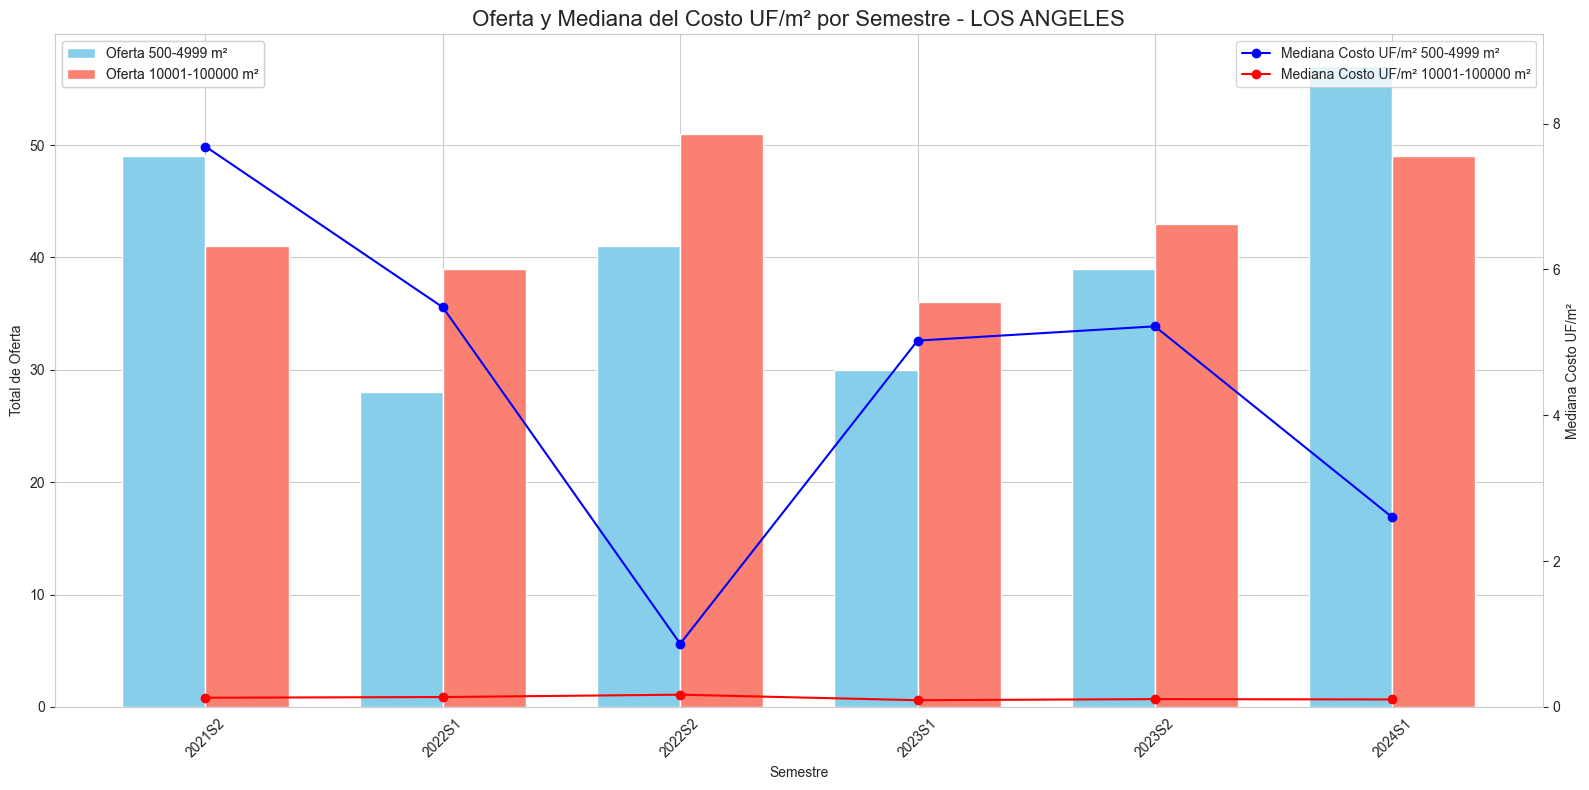

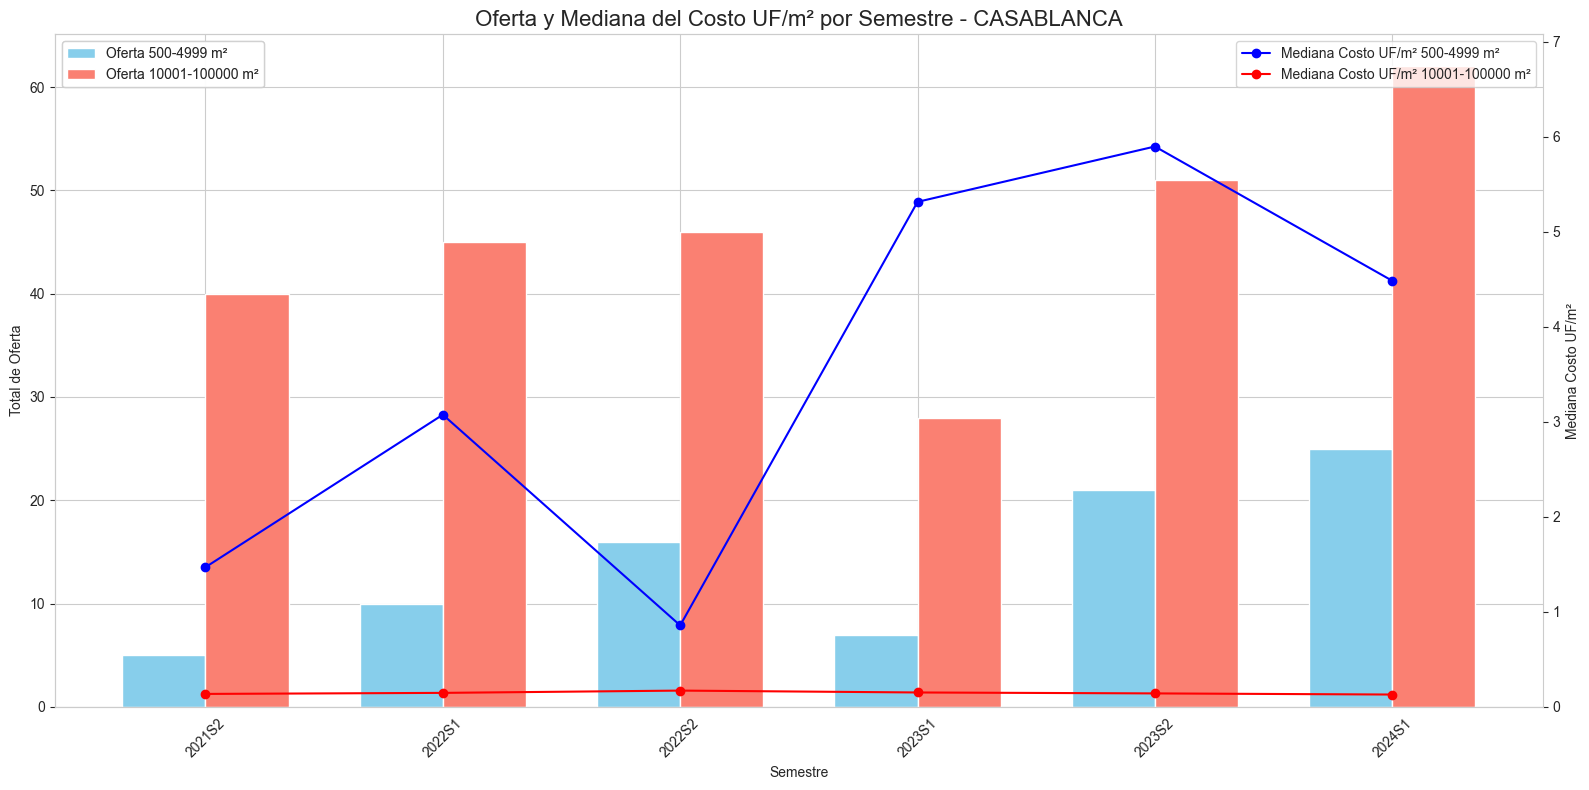

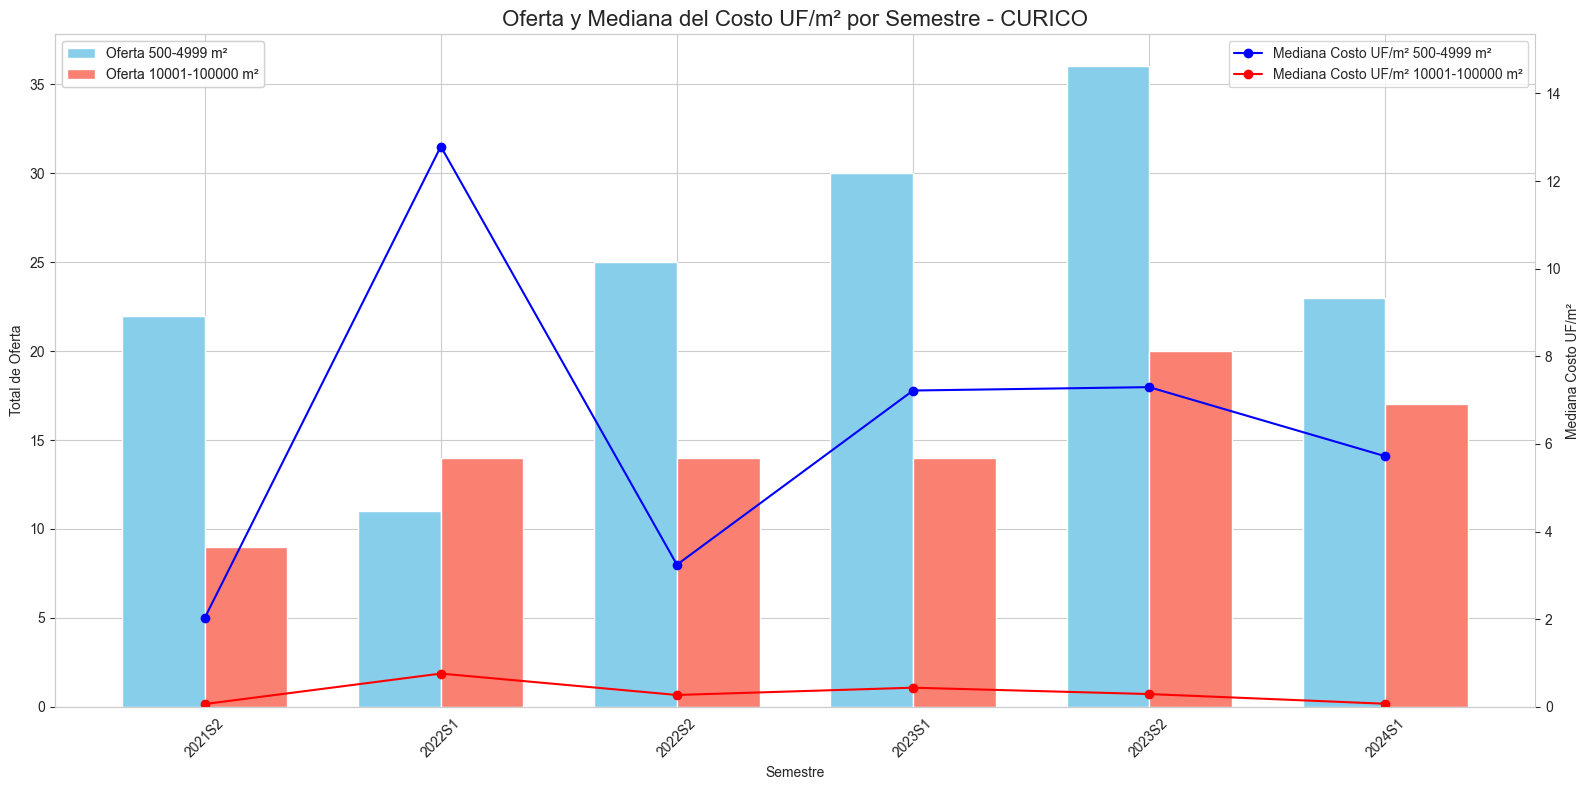

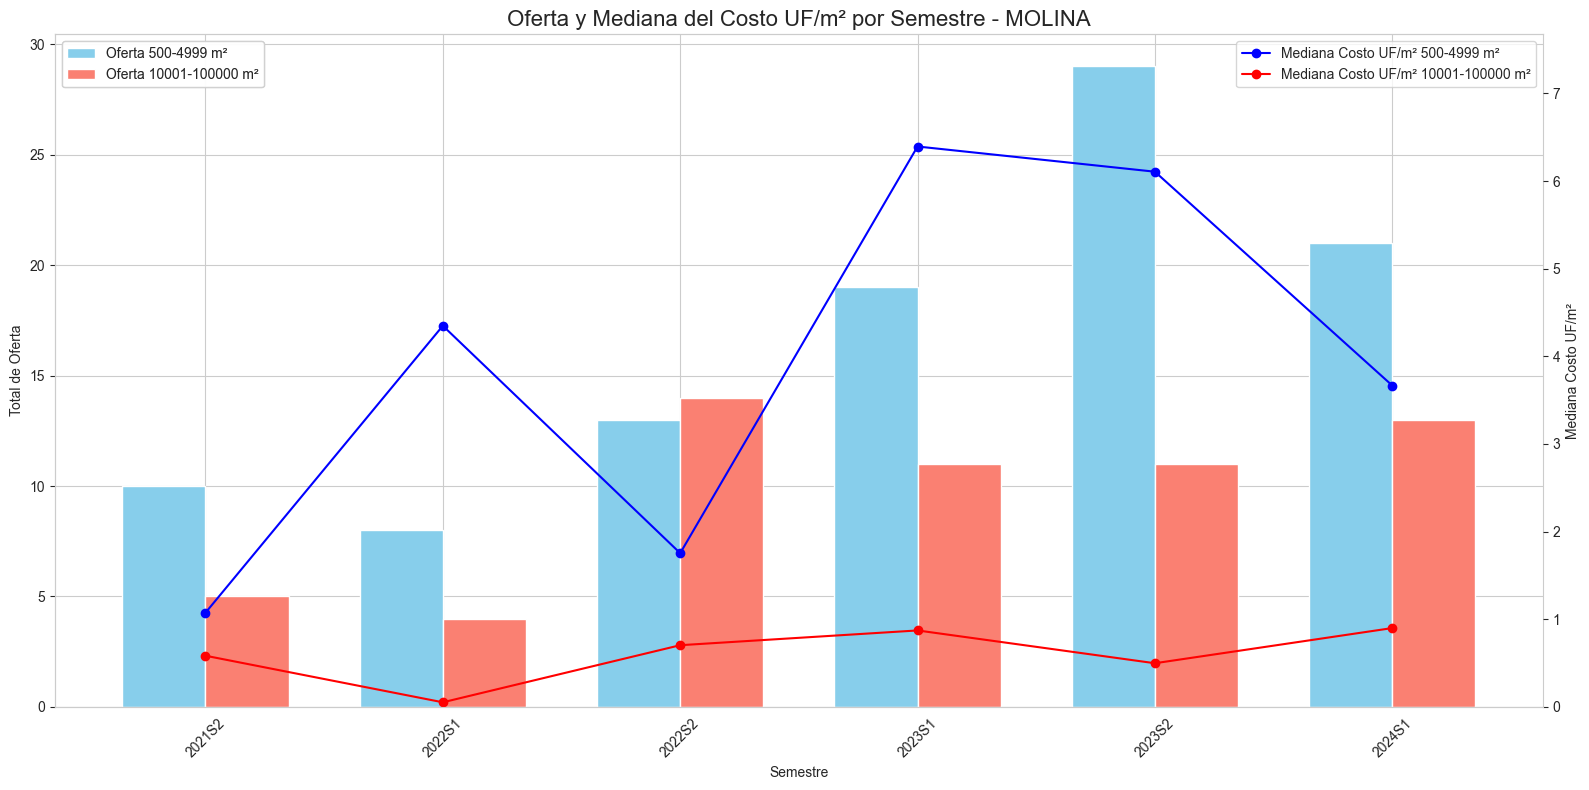

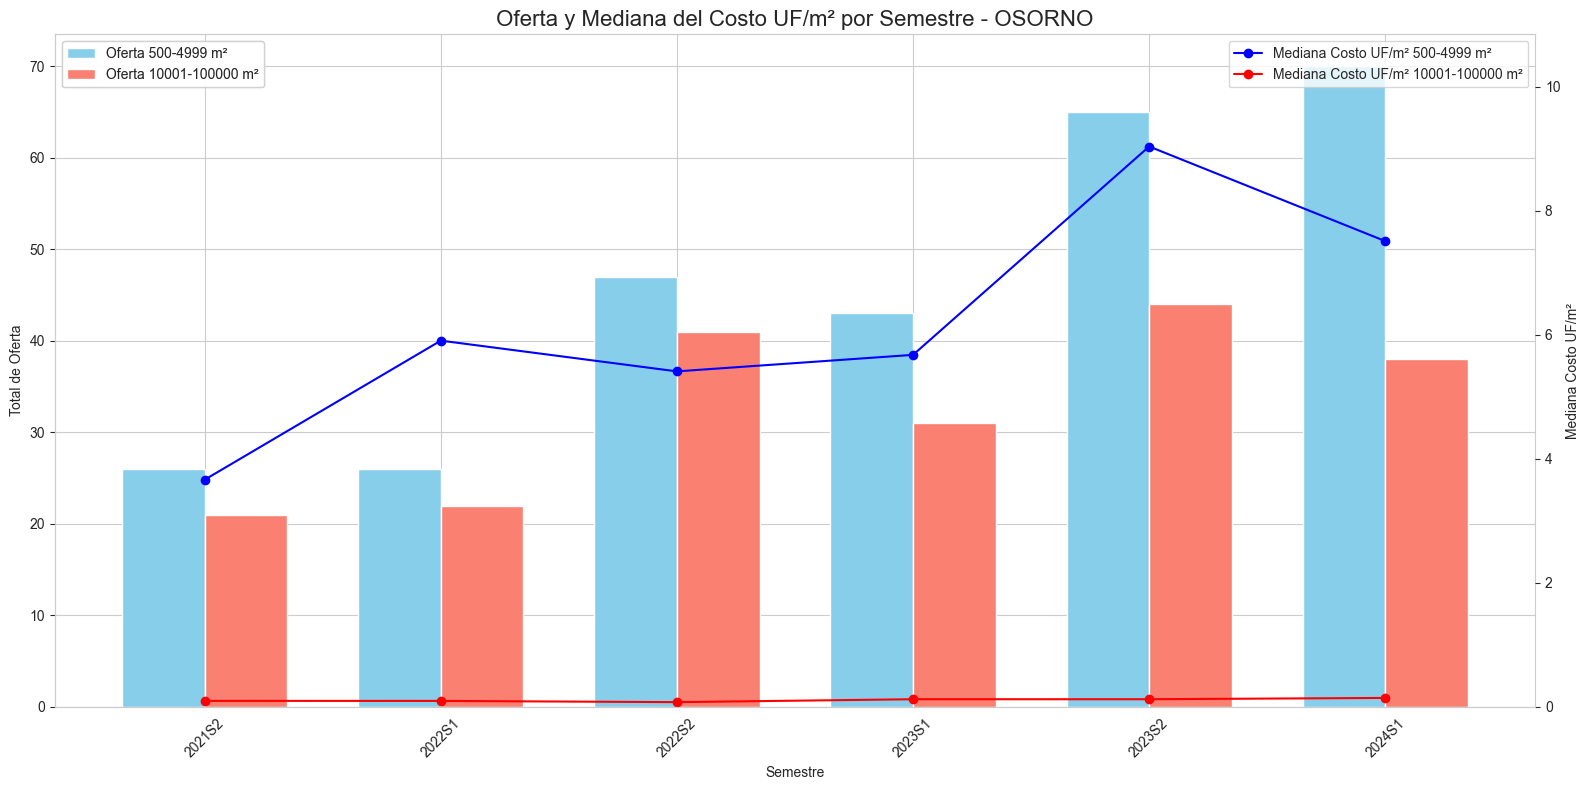

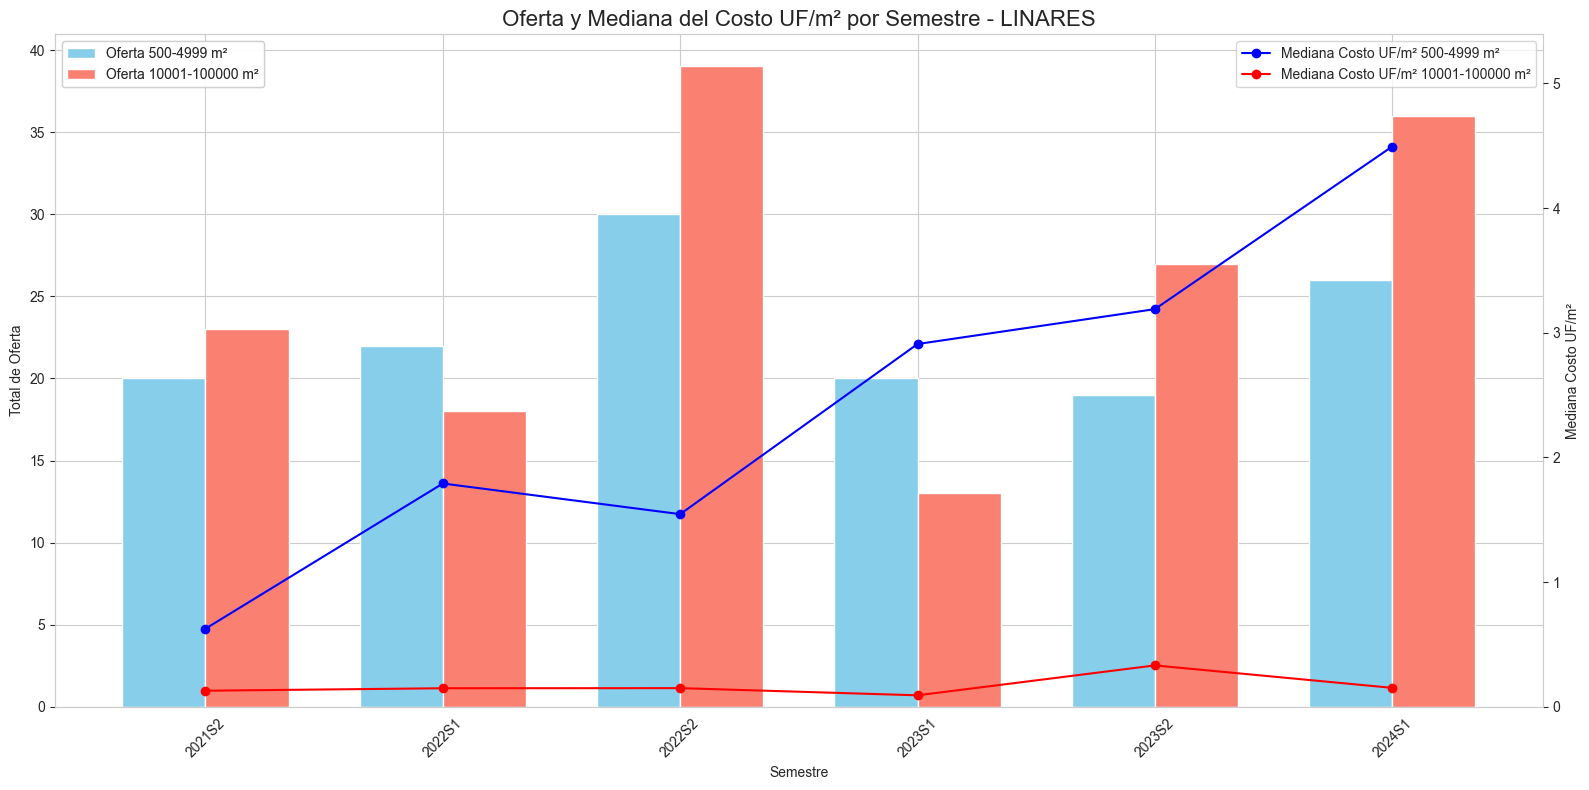

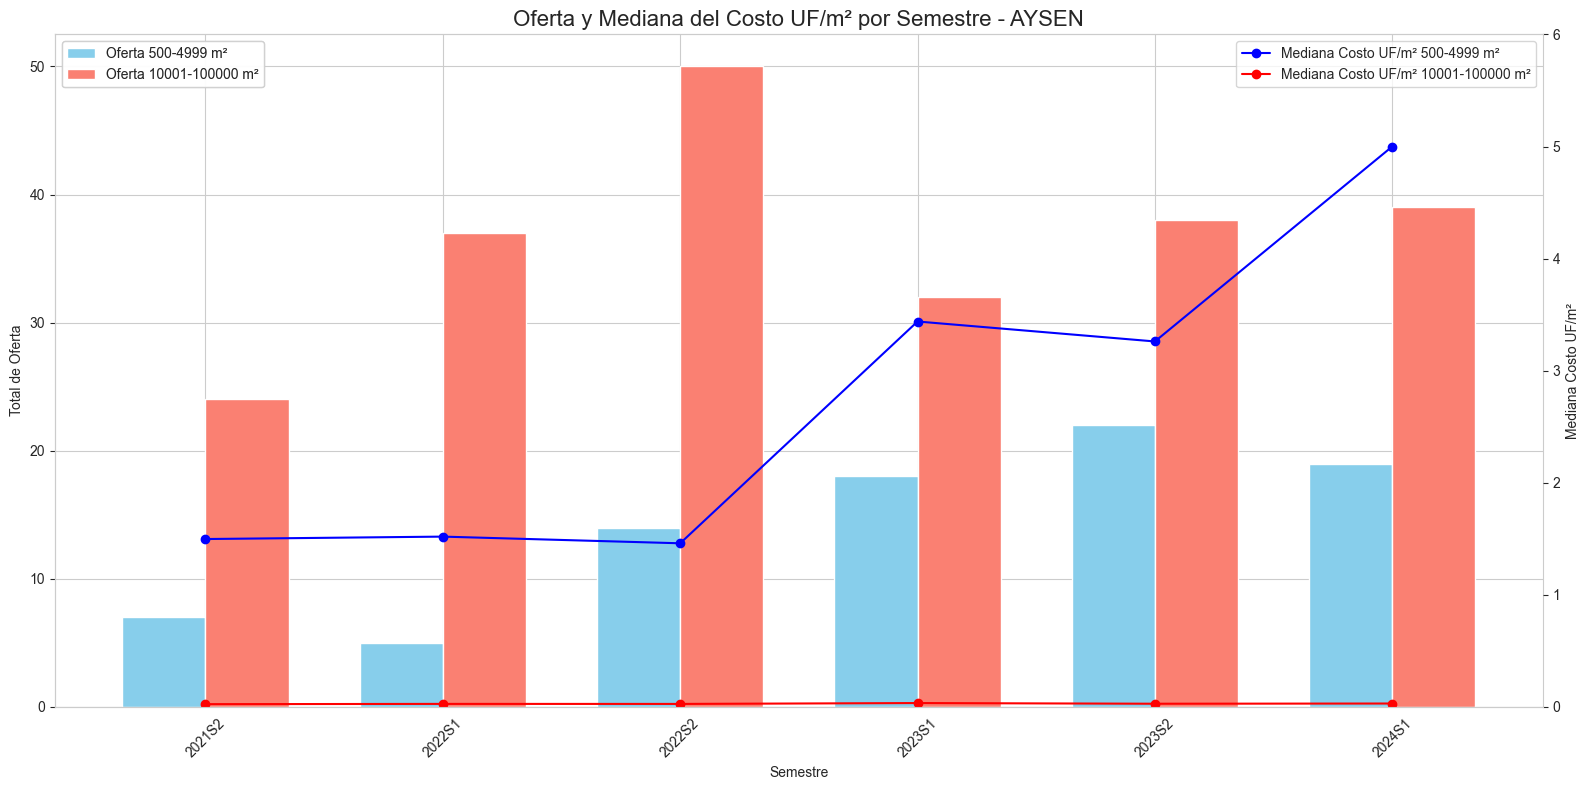

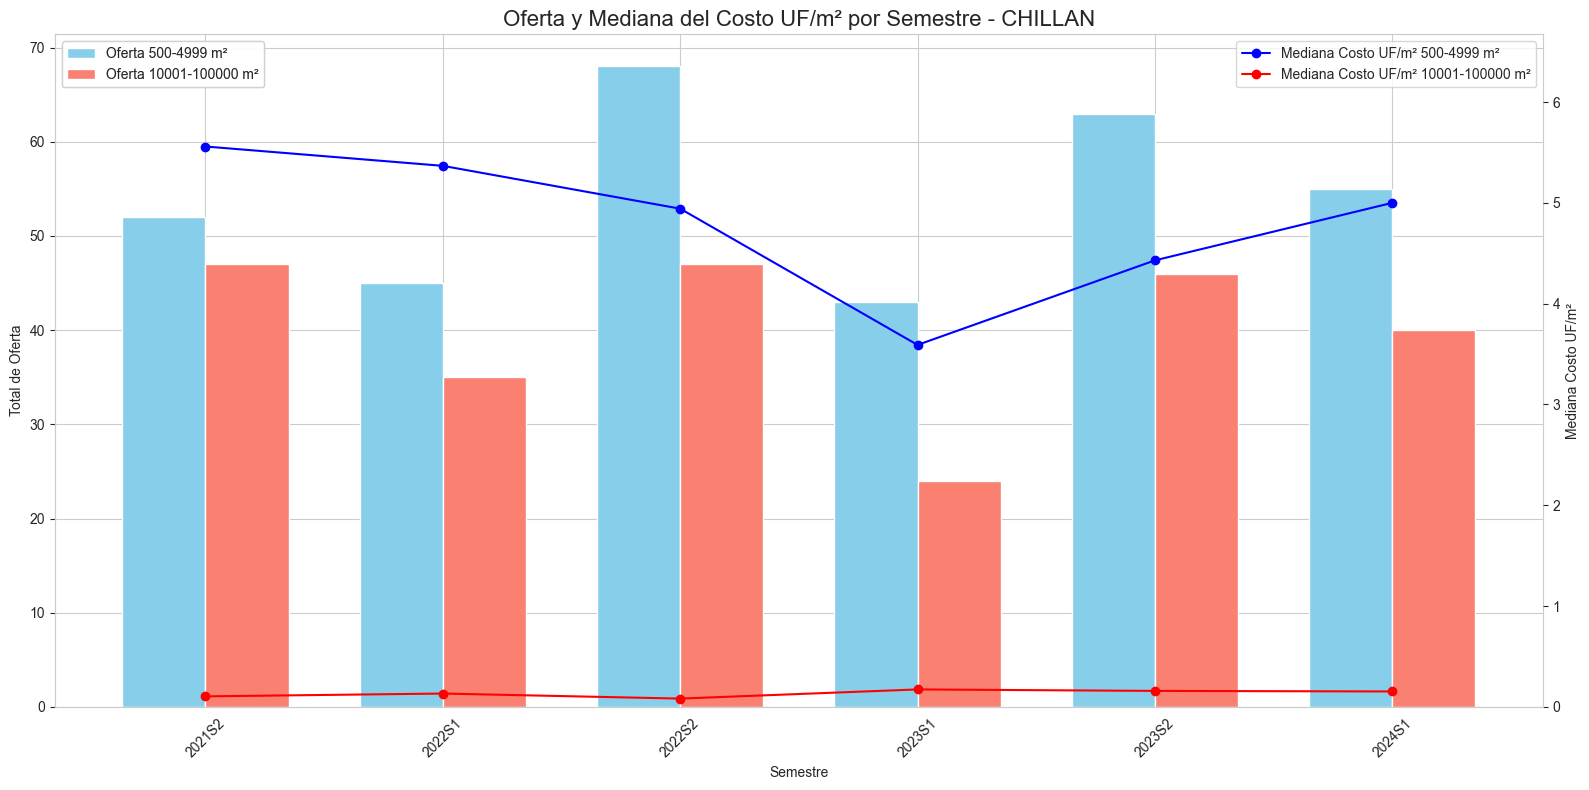

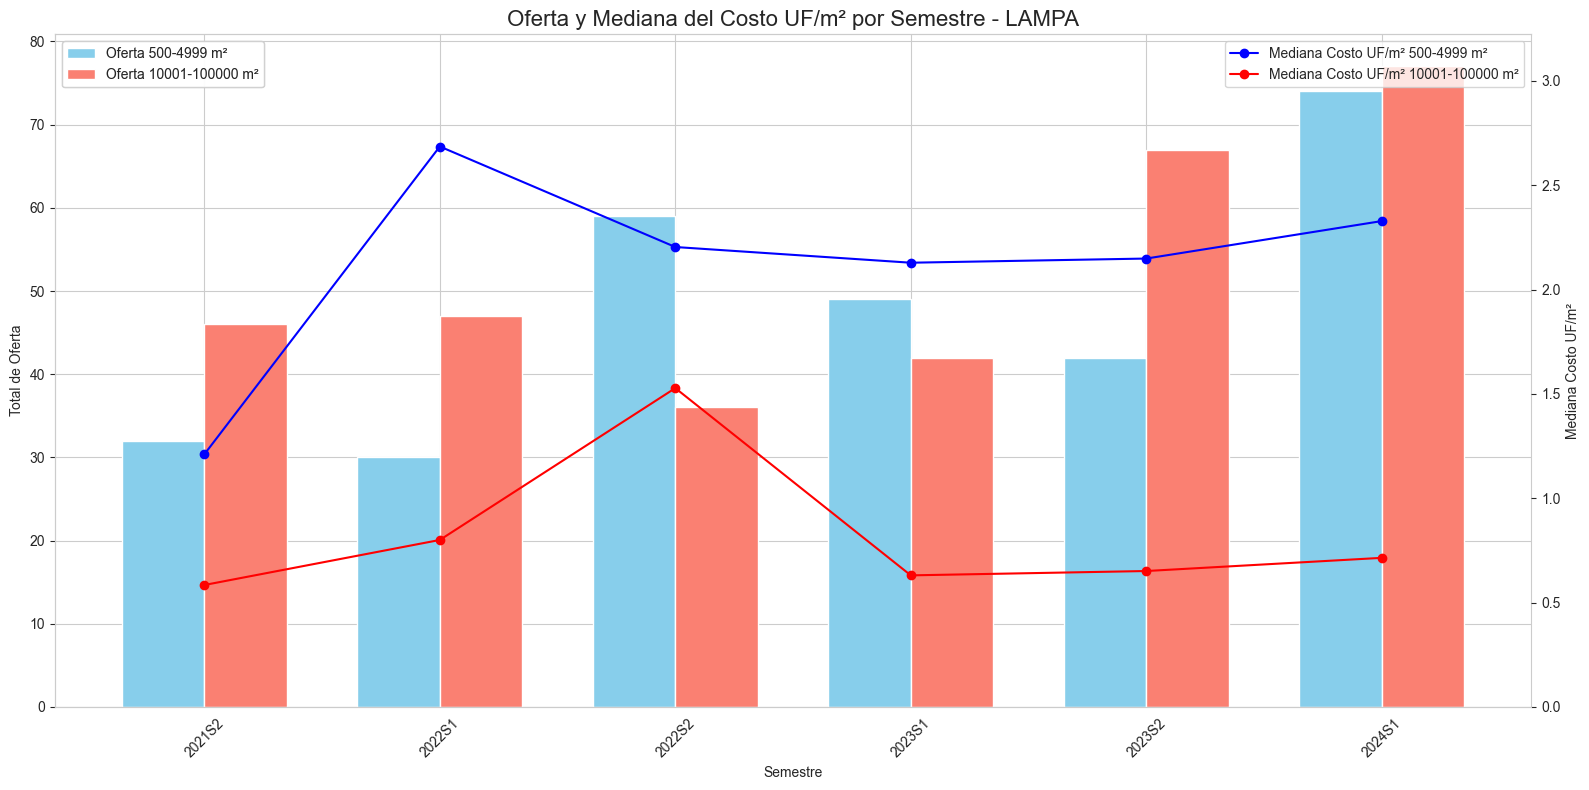

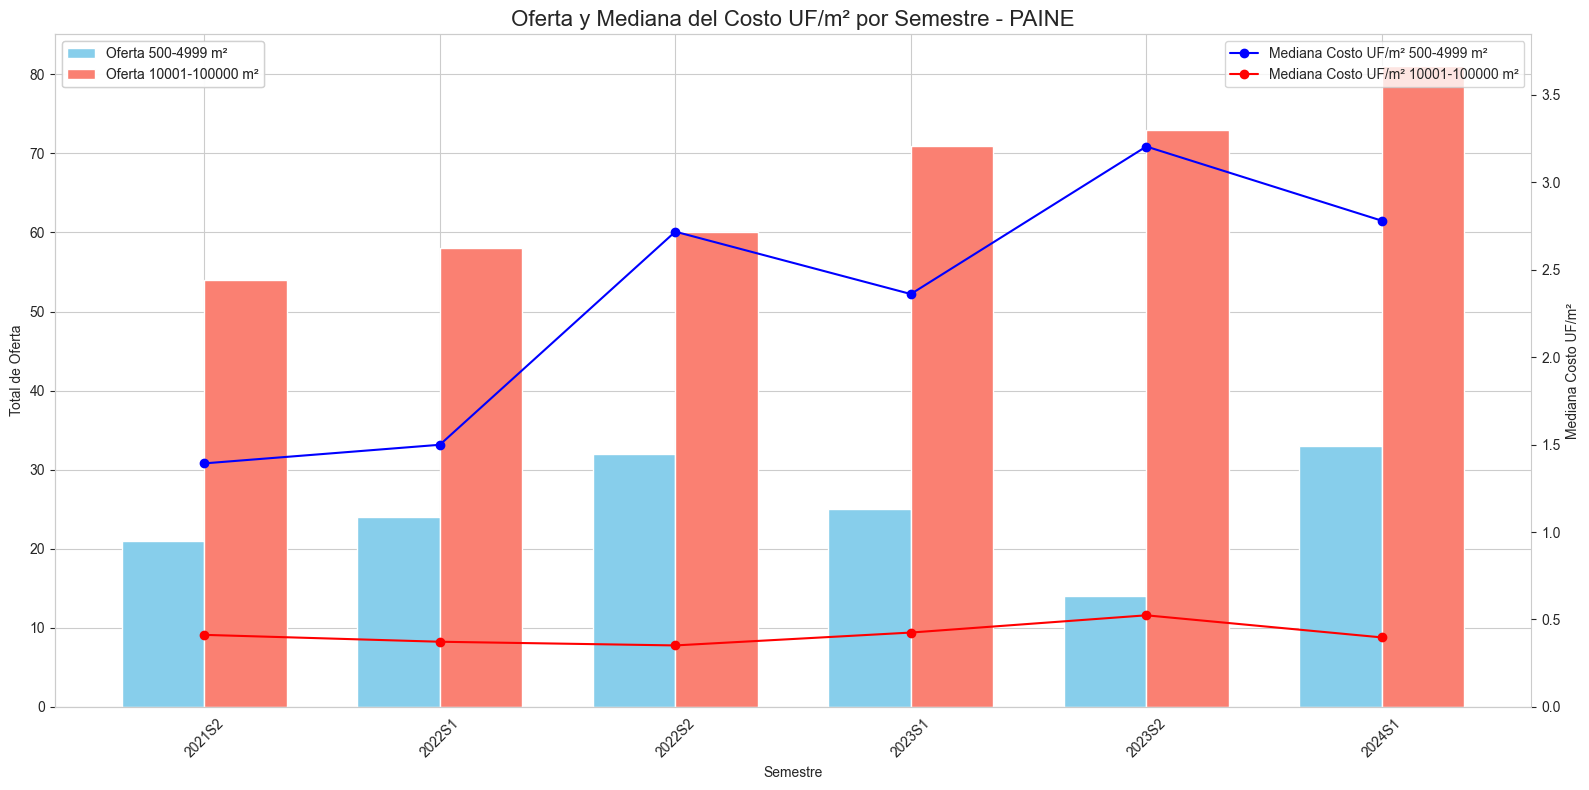

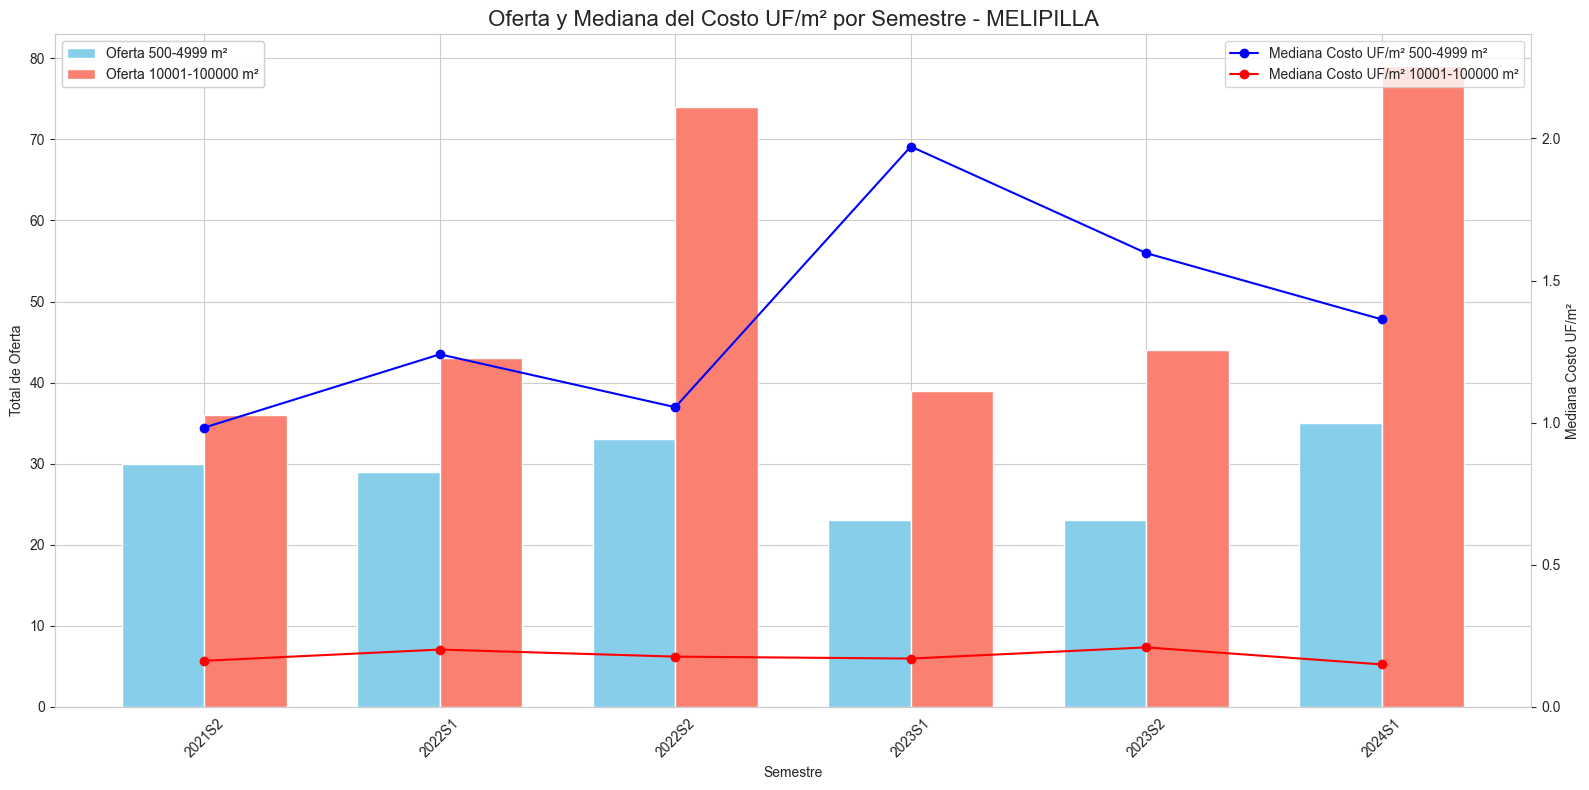

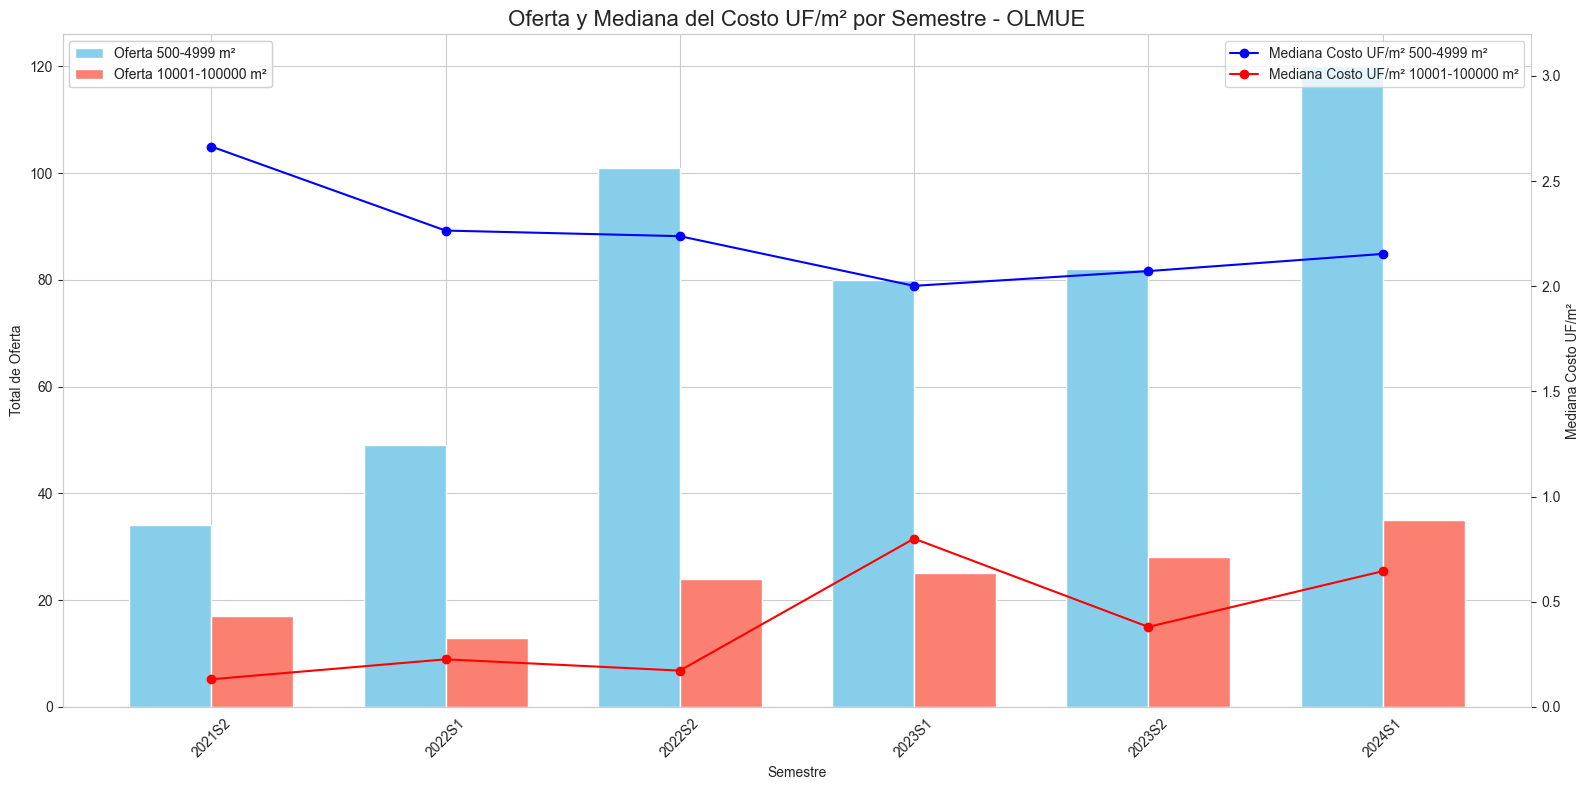

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Comunas para los gráficos
comunas = [
    'LOS ANGELES', 'CASABLANCA', 'CURICO', 'MOLINA', 'OSORNO', 'LINARES',
    'AYSEN', 'CHILLAN', 'LAMPA', 'PAINE', 'MELIPILLA', 'OLMUE'
]

# Columnas para los totales y medianas de cada rango y semestre
columnas_totales_500_4999 = [
    'Total 500-4999 m2_2021S2', 'Total 500-4999 m2_2022S1', 'Total 500-4999 m2_2022S2',
    'Total 500-4999 m2_2023S1', 'Total 500-4999 m2_2023S2', 'Total 500-4999 m2_2024S1'
]
columnas_totales_10001_100000 = [
    'Total 10001-100000 m2_2021S2', 'Total 10001-100000 m2_2022S1', 'Total 10001-100000 m2_2022S2',
    'Total 10001-100000 m2_2023S1', 'Total 10001-100000 m2_2023S2', 'Total 10001-100000 m2_2024S1'
]
columnas_mediana_500_4999 = [
    'Mediana costo_m2_uf 500-4999 m2_2021S2', 'Mediana costo_m2_uf 500-4999 m2_2022S1', 'Mediana costo_m2_uf 500-4999 m2_2022S2',
    'Mediana costo_m2_uf 500-4999 m2_2023S1', 'Mediana costo_m2_uf 500-4999 m2_2023S2', 'Mediana costo_m2_uf 500-4999 m2_2024S1'
]
columnas_mediana_10001_100000 = [
    'Mediana costo_m2_uf 10001-100000 m2_2021S2', 'Mediana costo_m2_uf 10001-100000 m2_2022S1', 'Mediana costo_m2_uf 10001-100000 m2_2022S2',
    'Mediana costo_m2_uf 10001-100000 m2_2023S1', 'Mediana costo_m2_uf 10001-100000 m2_2023S2', 'Mediana costo_m2_uf 10001-100000 m2_2024S1'
]

# Crear etiquetas de semestres
etiquetas_semestres = [col.split('_')[-1] for col in columnas_totales_500_4999]

# Crear gráficos para cada comuna
for comuna in comunas:
    # Filtrar datos para la comuna actual
    data_comuna = data_principal_filtrada[data_principal_filtrada['comuna_match'] == comuna]
    
    # Extraer datos para las barras y líneas
    oferta_500_4999 = data_comuna[columnas_totales_500_4999].values.flatten()
    oferta_10001_100000 = data_comuna[columnas_totales_10001_100000].values.flatten()
    mediana_500_4999 = data_comuna[columnas_mediana_500_4999].values.flatten()
    mediana_10001_100000 = data_comuna[columnas_mediana_10001_100000].values.flatten()
    
    # Crear la figura y los ejes
    fig, ax1 = plt.subplots(figsize=(16, 8))  # Aumentar el ancho del gráfico
    
    # Configurar posiciones para las barras
    x = np.arange(len(etiquetas_semestres))
    width = 0.35  # Ancho de las barras
    
    # Gráfica de barras para las ofertas
    ax1.bar(x - width/2, oferta_500_4999, width, label='Oferta 500-4999 m²', color='skyblue')
    ax1.bar(x + width/2, oferta_10001_100000, width, label='Oferta 10001-100000 m²', color='salmon')
    
    # Ejes y título
    ax1.set_xlabel('Semestre')
    ax1.set_ylabel('Total de Oferta')
    ax1.set_title(f'Oferta y Mediana del Costo UF/m² por Semestre - {comuna}', fontsize=16)
    ax1.set_xticks(x)
    ax1.set_xticklabels(etiquetas_semestres, rotation=45)
    ax1.grid(True)  # Activa la cuadrícula en el eje principal
    
    # Crear el segundo eje Y para las medianas
    ax2 = ax1.twinx()
    ax2.set_ylabel('Mediana Costo UF/m²')
    ax2.spines['right'].set_visible(False)  # Ocultar la línea del eje secundario
    ax2.grid(False)  # Desactiva la cuadrícula en el segundo eje
    
    # Ajustar el rango del eje secundario para una escala proporcional
    max_median = max(max(mediana_500_4999), max(mediana_10001_100000))
    ax2.set_ylim(0, max_median * 1.2)
    
    # Agregar líneas de mediana para cada rango en el segundo eje
    line1, = ax2.plot(x, mediana_500_4999, marker='o', color='blue', linestyle='-', label='Mediana Costo UF/m² 500-4999 m²')
    line2, = ax2.plot(x, mediana_10001_100000, marker='o', color='red', linestyle='-', label='Mediana Costo UF/m² 10001-100000 m²')
    
    # Combinar leyendas de ambos ejes
    bars_legend = ax1.legend(loc='upper left')
    ax2.legend(handles=[line1, line2], loc='upper right')
    ax1.add_artist(bars_legend)  # Agregar la leyenda de las barras al gráfico
    
    # Mostrar gráfico
    plt.tight_layout()
    plt.show()



## Profundización en Linares y Paine 

### Lectura de datos con ofertas

In [99]:
import pandas as pd
data_2021 = pd.read_csv("data recuperada/data_sin_outliers.csv")

In [102]:
data_2021.columns

Index(['id', 'concat', 'publicada', 'created_at', 'data_source', 'tipo',
       'sub_tipo', 'precio_clp', 'precio_uf', 'region', 'comuna', 'latitude',
       'longitude', 'total_o_terreno', 'util_o_construido', 'active',
       'fecha_finalizacion', 'precio_clp_inicial', 'precio_uf_inicial',
       'descripcion_sin_saltos', 'direccion_sin_saltos', 'descripcion_2',
       'region_norm', 'comuna_norm', 'comuna_match', 'superficies_dict',
       'mayor_superficie', 'diferencia_pct', 'diferencia_abs', 'semestre',
       'descripcion_normalizada', 'duplicados_con', 'duplicado',
       'valor_uf_inicial', 'valor_uf', 'margen_uf_inicial', 'margen_uf',
       'dif_pct_abs', 'UF_Ha', 'total_o_terreno_ha', 'UF_Ha_inicial',
       'superficie_Ha', 'valores_terreno', 'costo_m2_uf', 'rango_superficie',
       'is_outlier'],
      dtype='object')

### Linares

In [103]:
data_linares = data_2021[(data_2021['comuna_match'] == 'LINARES') & ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2')) & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]


In [106]:
data_linares

,id,concat,publicada,created_at,data_source,tipo,sub_tipo,precio_clp,precio_uf,region,...,margen_uf,dif_pct_abs,UF_Ha,total_o_terreno_ha,UF_Ha_inicial,superficie_Ha,valores_terreno,costo_m2_uf,rango_superficie,is_outlier
35563,6484643,https://www.yapo.cl/inmuebles/propiedad_87980164,2024-06-11,2023-09-04,Yapo,Terreno,Terreno,4.227904e+08,11250.000000,MAULE,...,1,233.666667,75000.000000,0.1500,75000.000000,0.1500,"{'valor_1': {'valor': 30494.0, 'moneda': 'desc...",7.500000,500-4999 m2,0
35564,6727087,https://new.yapo.cl/inmuebles/propiedad_88451875,2024-05-15,2023-11-30,Yapo,Terreno,Terreno,7.500000e+07,2006.811922,MAULE,...,1,0.000000,25085.149030,0.0800,25650.300088,0.0800,"{'valor_1': {'valor': 800.0, 'moneda': 'descon...",2.508515,500-4999 m2,0
35565,6727108,https://new.yapo.cl/inmuebles/propiedad_88451876,2024-01-25,2023-11-30,Yapo,Terreno,Terreno,2.000000e+08,5430.367484,MAULE,...,1,NaN,30439.279618,0.1784,30673.004590,0.1784,"{'valor_1': {'valor': 1784.0, 'moneda': 'desco...",3.043928,500-4999 m2,0
35566,6730192,https://new.yapo.cl/inmuebles/propiedad_88451945,2024-05-15,2023-12-01,Yapo,Terreno,Terreno,2.000000e+07,535.149846,MAULE,...,1,614.285714,7644.997800,0.0700,7817.234313,0.0700,"{'valor_1': {'valor': 20000000.0, 'moneda': 'd...",0.764500,500-4999 m2,0
35567,6730203,https://new.yapo.cl/inmuebles/propiedad_88451878,2024-05-14,2023-12-01,Yapo,Terreno,Terreno,1.345418e+09,36000.000000,MAULE,...,1,NaN,180000.000000,0.2000,180000.000000,0.2000,"{'valor_1': {'valor': 2000.0, 'moneda': 'desco...",18.000000,500-4999 m2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174936,7711651,https://www.portalinmobiliario.com/MLC-1499392...,2024-07-02,2024-07-03,Portalinmobiliario,Terreno,Terreno,6.000000e+07,1596.535730,MAULE,...,1,0.000000,798.267865,2.0000,798.390232,2.0000,"{'valor_1': {'valor': 2.0, 'moneda': 'CLP', 'u...",0.079827,10001-100000 m2,0
174937,7827767,https://www.portalinmobiliario.com/MLC-2606581...,2024-07-24,2024-07-25,Portalinmobiliario,Terreno,Terreno,5.000000e+07,1330.145595,MAULE,...,1,66.887417,440.445561,3.0200,440.445561,3.0200,"{'valor_1': {'valor': 4.0, 'moneda': 'desconoc...",0.044045,10001-100000 m2,0
174938,7851625,https://www.portalinmobiliario.com/MLC-2612592...,2024-07-26,2024-07-27,Portalinmobiliario,Terreno,Agrícola,6.000000e+08,15965.357303,MAULE,...,1,0.000000,1995.669663,8.0000,1995.218393,8.0000,"{'valor_1': {'valor': 8.0, 'moneda': 'desconoc...",0.199567,10001-100000 m2,0
174939,7921707,https://www.yapo.cl/inmuebles/propiedad_89803333,2024-07-10,2024-07-31,Yapo,Terreno,Terreno,5.000000e+07,1330.446442,MAULE,...,1,33.774834,440.545179,3.0200,440.545179,3.0200,"{'valor_1': {'valor': 11.0, 'moneda': 'descono...",0.044055,10001-100000 m2,0


In [112]:
# Extraer la columna "descripcion_sin_saltos" y convertirla a una lista
linares_500m2  = data_linares[data_linares['rango_superficie'] == '500-4999 m2']
descripciones_500 = linares_500m2['descripcion_sin_saltos'].tolist()

# Imprimir la cantidad de descripciones
print(f"Total de descripciones: {len(descripciones_500)}")

# Imprimir las primeras descripciones para revisar el contenido
for i, descripcion in enumerate(descripciones_500[:30], start=1):  # Cambia el número para ver más o menos descripciones
    print(f"Descripción {i}: {descripcion}\n")


Total de descripciones: 30
Descripción 1: ID 30494 Precioso terreno a la orilla del Lago Colbún en la Región del Maule, con su casa construida de 125m2. En el lago se ofrece diferentes actividades como pesca, canotaje, velero y turismo aventura.<br /><br /><br />CONTACTAR AL +56992185807 o al correo: <br /><br />Tiene actividades como la semana musical, fiesta gastronómica, Las termas de Panimávida y el circuito cultural y Yerbas buenas y el museo de Historia de la Independencia.<br /><br />Acogedora casa orilla del lago en pequeña y exclusiva bahía con bosque nativo en sector Las Pataguas con vista a la cordillera (oriente). Con casa amoblada de 125m2, más bodega y terraza.<br />El terreno es subdividible a 1500m2<br />Descripción: Hall de entrada, amplio living comedor con chimenea, sala de estar con salamandra, cocina completa con loggia exterior y lavadora. Dormitorio principal en suite, 3 dormitorios más y pieza de servicio completa. Mas otro baño completo con luz natural al igual

In [115]:
# Extraer la columna "descripcion_sin_saltos" y convertirla a una lista
linares_10001m2  = data_linares[data_linares['rango_superficie'] == '10001-100000 m2']
descripciones_10001 = linares_10001m2['descripcion_sin_saltos'].tolist()

# Imprimir la cantidad de descripciones
print(f"Total de descripciones: {len(descripciones_10001)}")

# Imprimir las descripciones para revisar el contenido
for i, descripcion in enumerate(descripciones_10001[:43], start=1):  
    print(f"Descripción {i}: {descripcion}\n")

Total de descripciones: 43
Descripción 1: Vendo casa con parcela ubicada en Quinamávida. Sector turístico famoso por sus termas. El campo posee dos bosques y terreno despejado para cultivos. También posee muchos árboles nativos. La casa consta de dos dormitorios, una terraza, baño, livig - comedor, cocina, logia, agua potable y de pozo. No es loteo. Excenta de contribuciones (no paga). Ubicado en la pre cordillera, entre Linares y Colbún. A 20 minutos de Linares. 3,5 horas de Santiago. Vende su dueño

Descripción 2: nan

Descripción 3: En venta terreno plano de 4.65 ha, ubicado en Vega de Ancoa. A 12 km de Puente 3 Arcos, 24 km de Linares, 28 km Ruta 5.Destaca su flora y fauna nativa lo que hace de este un lugar ideal para abrir un centro turístico y disfrutar actividades de trekking. Destino perfecto para personas amantes de la naturaleza y actividades al aire libre.Factibilidad de luz y agua (noria y APR)

Descripción 4: Linda Parcela de 2 Hectreas, con Casa de 400 Mts2 construdos, c

### Paine

In [116]:
data_paine = data_2021[(data_2021['comuna_match'] == 'PAINE') & ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2')) & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [117]:
data_paine

,id,concat,publicada,created_at,data_source,tipo,sub_tipo,precio_clp,precio_uf,region,...,margen_uf,dif_pct_abs,UF_Ha,total_o_terreno_ha,UF_Ha_inicial,superficie_Ha,valores_terreno,costo_m2_uf,rango_superficie,is_outlier
42606,6711864,https://www.portalinmobiliario.com/MLC-1443358...,2024-03-31,2023-11-26,Portalinmobiliario,Terreno,Terreno,1.450000e+08,3891.883999,METROPOLITANA,...,1,NaN,57233.588225,0.0680,58396.230100,0.0680,{},5.723359,500-4999 m2,0
42607,6938212,https://www.portalinmobiliario.com/MLC-1456900...,2024-01-29,2024-02-09,Portalinmobiliario,Terreno,Terreno,6.775998e+07,1800.000000,METROPOLITANA,...,1,6.015038,33834.586466,0.0532,33834.586466,0.0532,"{'valor_1': {'valor': 11.0, 'moneda': 'descono...",3.383459,500-4999 m2,0
42608,7112457,https://www.portalinmobiliario.com/MLC-2317734...,2024-03-29,2024-03-10,Portalinmobiliario,Terreno,Terreno,6.200000e+07,1649.753588,METROPOLITANA,...,1,0.000000,23105.792549,0.0714,23537.563962,0.0714,"{'valor_1': {'valor': 100.0, 'moneda': 'descon...",2.310579,500-4999 m2,0
42609,7137129,https://www.portalinmobiliario.com/MLC-1470349...,2024-03-29,2024-03-15,Portalinmobiliario,Terreno,Terreno,2.240220e+08,5951.000000,METROPOLITANA,...,1,0.000000,23804.000000,0.2500,23804.000000,0.2500,"{'valor_1': {'valor': 2500.0, 'moneda': 'desco...",2.380400,500-4999 m2,0
42610,7154271,https://www.portalinmobiliario.com/MLC-2334908...,2024-04-18,2024-03-19,Portalinmobiliario,Terreno,Parcela,1.400000e+08,3731.033027,METROPOLITANA,...,1,0.000000,27802.034479,0.1342,28194.668192,0.1342,"{'valor_1': {'valor': 3.0, 'moneda': 'desconoc...",2.780203,500-4999 m2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179767,4397580,https://propiedades.elmercurio.com/propiedades...,2024-07-29,2022-06-17,Mercurio,Terreno,Terreno,3.946005e+09,105000.000000,METROPOLITANA,...,1,NaN,12029.558343,8.7285,12029.558343,8.7285,"{'valor_1': {'valor': 2.0, 'moneda': 'desconoc...",1.202956,10001-100000 m2,0
179768,4415944,https://propiedades.elmercurio.com/propiedades...,2024-07-29,2022-06-20,Mercurio,Terreno,Agrícola,3.670000e+08,9765.570000,METROPOLITANA,...,1,0.000000,1337.749315,7.3000,1526.115068,7.3000,"{'valor_1': {'valor': 73.0, 'moneda': 'descono...",0.133775,10001-100000 m2,0
179769,7770261,https://propiedades.elmercurio.com/propiedades...,2024-07-24,2024-07-14,Mercurio,Terreno,Terreno,1.900000e+09,50549.390000,METROPOLITANA,...,1,0.000000,5744.248864,8.8000,7555.407955,8.8000,"{'valor_1': {'valor': 88.0, 'moneda': 'descono...",0.574425,10001-100000 m2,0
179770,7865161,https://www.portalinmobiliario.com/MLC-1508147...,2024-07-26,2024-07-27,Portalinmobiliario,Terreno,Agrícola,8.332803e+08,21990.000000,METROPOLITANA,...,1,3.669725,10087.155963,2.1800,10087.155963,2.1800,"{'valor_1': {'valor': 5.0, 'moneda': 'desconoc...",1.008716,10001-100000 m2,0


In [119]:
# Extraer la columna "descripcion_sin_saltos" y convertirla a una lista
paine_500m2  = data_paine[data_paine['rango_superficie'] == '500-4999 m2']
descripciones_500 = paine_500m2['descripcion_sin_saltos'].tolist()

# Imprimir la cantidad de descripciones
print(f"Total de descripciones: {len(descripciones_500)}")

# Imprimir las primeras descripciones para revisar el contenido
for i, descripcion in enumerate(descripciones_500[:46], start=1):  # Cambia el número para ver más o menos descripciones
    print(f"Descripción {i}: {descripcion}\n")


Total de descripciones: 46
Descripción 1: OPORTUNIDAD ÚNICA: SITIO EN VENTA CON EXCELENTE UBICACIÓNPONEMOS A SU DISPOSICIÓN UN SITIO ÚNICO CON UBICACIÓN PRIVILEGIADA, CON ORILLA DE CAMINO Y UNA CASA QUE, AUNQUE EN ESTADO DETERIORADO, OFRECE UN POTENCIAL EXTRAORDINARIO. ESTE ESPACIO SE PRESENTA COMO LA OPCIÓN PERFECTA PARA DIVERSOS NEGOCIOS, COMO COMERCIOS, STRIP CENTERS, CENTROS DE ATENCIÓN DE SALUD, VETERINARIAS, ENTRE OTROS.CARACTERÍSTICAS DESTACADAS: -UBICACIÓN ESTRATÉGICA CON ACCESO DIRECTO DESDE EL CAMINO. -CASA EN EL TERRENO QUE PUEDE SER RENOVADA PARA ADAPTARSE A SUS   NECESIDADES. -IDEAL PARA COMERCIO, SERVICIOS DE SALUD, VETERINARIA, ENTRE OTROS.DOCUMENTACIÓN AL DÍA:TODOS LOS DOCUMENTOS ESTÁN EN REGLA, FACILITANDO EL PROCESO DE COMPRA Y ASEGURANDO UNA TRANSACCIÓN SEGURA.CONTACTO: ESTAMOS ABIERTOS A VISITAS Y DISPUESTOS A RESOLVER CUALQUIER DUDA QUE PUEDA TENER. NO DUDE EN PONERSE EN CONTACTO CON NOSOTROS PARA COORDINAR UNA VISITA O PARA OBTENER MÁS INFORMACIÓN SOBRE ESTA OPORT

In [120]:
# Extraer la columna "descripcion_sin_saltos" y convertirla a una lista
paine_10001m2  = data_paine[data_paine['rango_superficie'] == '10001-100000 m2']
descripciones_10001 = paine_10001m2['descripcion_sin_saltos'].tolist()

# Imprimir la cantidad de descripciones
print(f"Total de descripciones: {len(descripciones_10001)}")

# Imprimir las primeras descripciones para revisar el contenido
for i, descripcion in enumerate(descripciones_10001[:99], start=1):  # Cambia el número para ver más o menos descripciones
    print(f"Descripción {i}: {descripcion}\n")

Total de descripciones: 99
Descripción 1: Sitio de 1,2 hectáreas plantado con alfalfa. Este sitio tiene un rápido acceso a calle 18 de septiembre y a acceso Sur.Excelente posiblidad para disfrutar en familia de un precioso entorno y tranquilidad a 45 minutos de SantiagoLuz y agua potable.Posibilidad de comprar también paño completo de 3,2 hectáreas con linda casa estilo sureño en excelente estado.

Descripción 2: Terreno ubicado en Ruta 5 Sur, con acceso directo de la Ruta, frente a paso peatonal . Ubicado en la Comuna de Paine. Todo esto lo hace ser sumamente atractivo para inversionistas, e ideal para empresas agrícolas, industrias e inmobiliarias, ya que se encuentra en sector consolidado. La propiedad tiene una superficie de 25.400 m2

Descripción 3: 8,5 Hectáreas, 170 m2 de frente, agua de riego, entorno de Naturaleza, tranquilidad, conectividad a ambas Carreteras, Colegios, Supermercado, Bancos, carabineros, una gran zona, con varios Condominios consolidados por alrededor.

Descr